<a href="https://colab.research.google.com/gist/pouyahosseinzadeh/0ca78931c8aaff6569b1f37f4f591289/sep_nsep_da_gaussian_100mev_5h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Solar Energetic Particle (SEP) Event Prediction

# Data Augmentation Using Gaussian for 100 MeV (5h)

In [ ]:
# Correct Version

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
!pip install tsfresh
!pip install sktime
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 13.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 62.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.8 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [ ]:
from sktime.classification.kernel_based import RocketClassifier

In [ ]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier


# [1/0] (No DA)

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_78.csv", header = 0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes

<ipython-input-10-d521cdc2284f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes


In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,event
0,0.00355,0.00312,0.00295,0.00356,0.00406,0.00288,0.00305,0.00336,0.00340,0.00303,...,0.00325,0.00336,0.00305,0.00312,0.00300,0.00327,0.00235,0.00288,0.00310,SEP
1,0.00902,0.00851,0.00771,0.00828,0.00736,0.00716,0.00785,0.00793,0.00726,0.00984,...,0.00690,0.00701,0.00697,0.00668,0.00697,0.00789,0.00776,0.00706,0.00716,SEP
2,0.00285,0.00284,0.00300,0.00288,0.00310,0.00264,0.00290,0.00255,0.00215,0.00231,...,0.00275,0.00255,0.00300,0.00226,0.00280,0.00298,0.00270,0.00274,0.00255,SEP
3,0.00265,0.00303,0.00295,0.00336,0.00285,0.00303,0.00310,0.00269,0.00205,0.00346,...,0.00310,0.00360,0.00235,0.00327,0.00260,0.00255,0.00285,0.00298,0.00290,SEP
4,0.00345,0.00308,0.00411,0.00346,0.00350,0.00375,0.00355,0.00360,0.00335,0.00351,...,0.00355,0.00389,0.00406,0.00351,0.00335,0.00356,0.00315,0.00327,0.00330,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.00226,0.00200,0.00202,0.00215,0.00226,0.00250,0.00202,0.00180,0.00240,0.00185,...,0.00197,0.00200,0.00144,0.00150,0.00168,0.00165,0.00192,0.00165,0.00154,NSEP
182,0.00185,0.00149,0.00170,0.00183,0.00205,0.00202,0.00168,0.00235,0.00205,0.00216,...,0.00205,0.00211,0.00165,0.00216,0.00205,0.00231,0.00230,0.00216,0.00221,NSEP
183,0.00187,0.00220,0.00144,0.00190,0.00255,0.00195,0.00245,0.00221,0.00175,0.00192,...,0.00178,0.00155,0.00221,0.00197,0.00140,0.00245,0.00190,0.00144,0.00185,NSEP
184,0.00245,0.00173,0.00130,0.00154,0.00140,0.00183,0.00245,0.00139,0.00190,0.00168,...,0.00160,0.00197,0.00185,0.00149,0.00120,0.00178,0.00205,0.00202,0.00170,NSEP


In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

lst_accu_stratified_A_TSF = []
lst_accuBalanced_stratified_A_TSF = []
lst_f1_stratified_A_TSF = []
lst_TSS_stratified_A_TSF = []

lst_accu_stratified_A_ROCKET = []
lst_accuBalanced_stratified_A_ROCKET = []
lst_f1_stratified_A_ROCKET = []
lst_TSS_stratified_A_ROCKET = []

lst_accu_stratified_A_SHAPELET = []
lst_accuBalanced_stratified_A_SHAPELET = []
lst_f1_stratified_A_SHAPELET = []
lst_TSS_stratified_A_SHAPELET = []

index = 0  
for train_index, test_index in skf.split(X, y):
    index = index + 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


    X_train = np.array(X_train) 
    X_test = np.array(X_test)
    y_train = np.array(y_train) 
    y_test = np.array(y_test)



    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(X_train, y_train)
    lst_accu_stratified_A_TSF.append(clf_A.score(X_test, y_test))
    pred_A = clf_A.predict(X_test)
    lst_accuBalanced_stratified_A_TSF.append(balanced_accuracy_score(y_test, pred_A)) # Balanced Accuracy
    f1_TSF_A = f1_score(y_test, pred_A, average="weighted")
    lst_f1_stratified_A_TSF.append(f1_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF.append(TSS_TSF_A)


    clf_A = RocketClassifier(num_kernels=1000, random_state = 42)
    clf_A.fit(X_train, y_train)
    lst_accu_stratified_A_ROCKET.append(clf_A.score(X_test, y_test))
    pred_A = clf_A.predict(X_test)
    lst_accuBalanced_stratified_A_ROCKET.append(balanced_accuracy_score(y_test, pred_A)) # Balanced Accuracy
    f1_ROCKET_A = f1_score(y_test, pred_A, average="weighted")
    lst_f1_stratified_A_ROCKET.append(f1_ROCKET_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_ROCKET_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_ROCKET.append(TSS_ROCKET_A)


    clf_A = ShapeletTransformClassifier(n_shapelet_samples=500, max_shapelets=20, random_state = 42)
    clf_A.fit(X_train, y_train)
    lst_accu_stratified_A_SHAPELET.append(clf_A.score(X_test, y_test))
    pred_A = clf_A.predict(X_test)
    lst_accuBalanced_stratified_A_SHAPELET.append(balanced_accuracy_score(y_test, pred_A)) # Balanced Accuracy
    f1_SHAPELET_A = f1_score(y_test, pred_A, average="weighted")
    lst_f1_stratified_A_SHAPELET.append(f1_SHAPELET_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_SHAPELET_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_SHAPELET.append(TSS_SHAPELET_A)



In [ ]:
import numpy as np

ACC_TSF_A = round(np.mean(lst_accu_stratified_A_TSF), 2)
ACC_TSF_A

0.69

In [ ]:
import numpy as np

ACCBALANCED_TSF_A = round(np.mean(lst_accuBalanced_stratified_A_TSF), 2)
ACCBALANCED_TSF_A

0.7

In [ ]:
import numpy as np

F1_TSF_A = round(np.mean(lst_f1_stratified_A_TSF), 2)
F1_TSF_A

0.69

In [ ]:
import numpy as np

ACC_ROCKET_A = round(np.mean(lst_accu_stratified_A_ROCKET), 2)
ACC_ROCKET_A

0.6

In [ ]:
import numpy as np

ACCBALANCED_ROCKET_A = round(np.mean(lst_accuBalanced_stratified_A_ROCKET), 2)
ACCBALANCED_ROCKET_A

0.6

In [ ]:
import numpy as np

F1_ROCKET_A = round(np.mean(lst_f1_stratified_A_ROCKET), 2)
F1_ROCKET_A

0.59

In [ ]:
import numpy as np

ACC_SHAPELET_A = round(np.mean(lst_accu_stratified_A_SHAPELET), 2)
ACC_SHAPELET_A

0.54

In [ ]:
import numpy as np

ACC_SHAPELET_A = round(np.mean(lst_accu_stratified_A_SHAPELET), 2)
ACC_SHAPELET_A

0.54

In [ ]:
import numpy as np

ACCBALANCED_SHAPELET_A = round(np.mean(lst_accuBalanced_stratified_A_SHAPELET), 2)
ACCBALANCED_SHAPELET_A

0.54

In [ ]:
import numpy as np

F1_SHAPELET_A = round(np.mean(lst_f1_stratified_A_SHAPELET), 2)
F1_SHAPELET_A

0.53

# [1/1]

In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [ ]:
SEP_df_1 = pd.read_csv("/content/sample_data/SEP_data.csv", header = 0)
# SEP_df_1 = SEP_df_1.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_156 = pd.read_csv("/content/sample_data/NSEP_data_156.csv", header = 0)
# NSEP_df_156 = NSEP_df_156.drop([78, 79, 80, 80])

In [ ]:
def DA_Jitter(X, sigma, p):  # 0.00089  or  0.03  or 0.0002
    R = np.random.RandomState(p)
    myNoise = R.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise

In [ ]:
SEP_df_2 = DA_Jitter(SEP_df_1, 0.0002, 2)

In [ ]:
SEP_df_156= SEP_df_1.append(SEP_df_2)
SEP_df_156 = SEP_df_156.reset_index(drop = True)

<ipython-input-31-85200dd89e45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEP_df_156= SEP_df_1.append(SEP_df_2)


In [ ]:
SEP_df_156

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.003550,0.003120,0.002950,0.003560,0.004060,0.002880,0.003050,0.003360,0.003400,0.003030,...,0.004470,0.003250,0.003360,0.003050,0.003120,0.003000,0.003270,0.002350,0.002880,0.003100
1,0.009020,0.008510,0.007710,0.008280,0.007360,0.007160,0.007850,0.007930,0.007260,0.009840,...,0.007450,0.006900,0.007010,0.006970,0.006680,0.006970,0.007890,0.007760,0.007060,0.007160
2,0.002850,0.002840,0.003000,0.002880,0.003100,0.002640,0.002900,0.002550,0.002150,0.002310,...,0.002840,0.002750,0.002550,0.003000,0.002260,0.002800,0.002980,0.002700,0.002740,0.002550
3,0.002650,0.003030,0.002950,0.003360,0.002850,0.003030,0.003100,0.002690,0.002050,0.003460,...,0.002550,0.003100,0.003600,0.002350,0.003270,0.002600,0.002550,0.002850,0.002980,0.002900
4,0.003450,0.003080,0.004110,0.003460,0.003500,0.003750,0.003550,0.003600,0.003350,0.003510,...,0.003410,0.003550,0.003890,0.004060,0.003510,0.003350,0.003560,0.003150,0.003270,0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.004777,0.003730,0.004390,0.004596,0.004651,0.003469,0.005081,0.004512,0.004038,0.004814,...,0.004950,0.004202,0.003901,0.005117,0.005399,0.004787,0.004838,0.003683,0.004779,0.004473
182,0.003691,0.002962,0.004136,0.003639,0.003678,0.003503,0.002713,0.003530,0.003838,0.003255,...,0.003463,0.004326,0.003965,0.003018,0.004231,0.003419,0.003778,0.003841,0.003821,0.003896
183,0.004853,0.004463,0.005442,0.004668,0.004394,0.004996,0.005071,0.004516,0.004460,0.004776,...,0.004119,0.004790,0.004537,0.004253,0.004699,0.004246,0.004309,0.004339,0.004604,0.003757
184,0.003695,0.003887,0.004923,0.004374,0.004114,0.004055,0.003611,0.005281,0.004614,0.004308,...,0.004079,0.004571,0.003808,0.004192,0.004079,0.003994,0.004463,0.004276,0.003563,0.004475


In [ ]:
data = SEP_df_156.append(NSEP_df_156) # append the two SEP and NSEP dataframes

<ipython-input-33-a22e70375fbb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = SEP_df_156.append(NSEP_df_156) # append the two SEP and NSEP dataframes


In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df_156) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,event
0,0.00355,0.00312,0.00295,0.00356,0.00406,0.00288,0.00305,0.00336,0.00340,0.00303,...,0.00325,0.00336,0.00305,0.00312,0.00300,0.00327,0.00235,0.00288,0.00310,SEP
1,0.00902,0.00851,0.00771,0.00828,0.00736,0.00716,0.00785,0.00793,0.00726,0.00984,...,0.00690,0.00701,0.00697,0.00668,0.00697,0.00789,0.00776,0.00706,0.00716,SEP
2,0.00285,0.00284,0.00300,0.00288,0.00310,0.00264,0.00290,0.00255,0.00215,0.00231,...,0.00275,0.00255,0.00300,0.00226,0.00280,0.00298,0.00270,0.00274,0.00255,SEP
3,0.00265,0.00303,0.00295,0.00336,0.00285,0.00303,0.00310,0.00269,0.00205,0.00346,...,0.00310,0.00360,0.00235,0.00327,0.00260,0.00255,0.00285,0.00298,0.00290,SEP
4,0.00345,0.00308,0.00411,0.00346,0.00350,0.00375,0.00355,0.00360,0.00335,0.00351,...,0.00355,0.00389,0.00406,0.00351,0.00335,0.00356,0.00315,0.00327,0.00330,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.00154,0.00210,0.00192,0.00220,0.00211,0.00195,0.00231,0.00185,0.00192,0.00216,...,0.00178,0.00185,0.00197,0.00250,0.00274,0.00210,0.00183,0.00202,0.00230,NSEP
368,0.00192,0.00200,0.00173,0.00215,0.00178,0.00205,0.00255,0.00195,0.00149,0.00215,...,0.00221,0.00155,0.00226,0.00245,0.00216,0.00220,0.00187,0.00220,0.00183,NSEP
369,0.00195,0.00192,0.00160,0.00202,0.00170,0.00197,0.00170,0.00231,0.00265,0.00183,...,0.00160,0.00168,0.00235,0.00216,0.00205,0.00221,0.00185,0.00231,0.00185,NSEP
370,0.00250,0.00185,0.00240,0.00265,0.00211,0.00195,0.00163,0.00226,0.00170,0.00235,...,0.00173,0.00260,0.00192,0.00260,0.00207,0.00197,0.00210,0.00226,0.00265,NSEP


In [ ]:
# output_B = my_data_all.copy()
# output_B.to_csv('/content/DATA_B.csv', index=False)

In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
# # transform the dataset
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE(random_state = 42)
# X, y = oversample.fit_resample(X, y)

In [ ]:
# SEP_train_index = y_train.where(y_train=='SEP').dropna().index


In [ ]:
# X.iloc[SEP_train_index]

In [ ]:
# y_train.iloc[76]

In [ ]:
# SEP_train_index

In [ ]:
# test_index

In [ ]:
# X_train.iloc[SEP_train_index]

In [ ]:
box_accuracy_B_TSF = []
box_accuracyBalanced_B_TSF = []
box_f1_B_TSF = []

box_accuracy_B_ROCKET = []
box_accuracyBalanced_B_ROCKET = []
box_f1_B_ROCKET = []

box_accuracy_B_SHAPELET = []
box_accuracyBalanced_B_SHAPELET = []
box_f1_B_SHAPELET = []

# random_state_values = [0, 2, 10, 30, 42]
random_state_values = [42]
for p in random_state_values:

  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

  lst_accu_stratified_B_TSF = []
  lst_accuBalanced_stratified_B_TSF = []
  lst_f1_stratified_B_TSF = []

  lst_accu_stratified_B_ROCKET = []
  lst_accuBalanced_stratified_B_ROCKET = []
  lst_f1_stratified_B_ROCKET = []

  lst_accu_stratified_B_SHAPELET = []
  lst_accuBalanced_stratified_B_SHAPELET = []
  lst_f1_stratified_B_SHAPELET = []


  index = 0  
  for train_index, test_index in skf.split(X, y):
      index = index + 1
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]



      X_train = np.array(X_train) 
      X_test = np.array(X_test)
      y_train = np.array(y_train) 
      y_test = np.array(y_test)



      clf_B = TimeSeriesForestClassifier(n_estimators=150, random_state = 2)
      clf_B.fit(X_train, y_train)
      lst_accu_stratified_B_TSF.append(clf_B.score(X_test, y_test))
      pred_B = clf_B.predict(X_test)
      lst_accuBalanced_stratified_B_TSF.append(balanced_accuracy_score(y_test, pred_B)) # Balanced Accuracy
      f1_TSF_B = f1_score(y_test, pred_B, average="weighted")
      lst_f1_stratified_B_TSF.append(f1_TSF_B)





      clf_B = RocketClassifier(num_kernels=1000, random_state = 42)
      clf_B.fit(X_train, y_train)
      lst_accu_stratified_B_ROCKET.append(clf_B.score(X_test, y_test))
      pred_B = clf_B.predict(X_test)
      lst_accuBalanced_stratified_B_ROCKET.append(balanced_accuracy_score(y_test, pred_B)) # Balanced Accuracy
      f1_ROCKET_B = f1_score(y_test, pred_B, average="weighted")
      lst_f1_stratified_B_ROCKET.append(f1_ROCKET_B)



      clf_B = ShapeletTransformClassifier(n_shapelet_samples=500, max_shapelets=15, random_state = 42)
      clf_B.fit(X_train, y_train)
      lst_accu_stratified_B_SHAPELET.append(clf_B.score(X_test, y_test))
      pred_B = clf_B.predict(X_test)
      lst_accuBalanced_stratified_B_SHAPELET.append(balanced_accuracy_score(y_test, pred_B)) # Balanced Accuracy
      f1_SHAPELET_B = f1_score(y_test, pred_B, average="weighted")
      lst_f1_stratified_B_SHAPELET.append(f1_SHAPELET_B)




  box_accuracy_B_TSF.append(lst_accu_stratified_B_TSF)
  box_accuracyBalanced_B_TSF.append(lst_accuBalanced_stratified_B_TSF)
  box_f1_B_TSF.append(lst_f1_stratified_B_TSF)

  box_accuracy_B_ROCKET.append(lst_accu_stratified_B_ROCKET)
  box_accuracyBalanced_B_ROCKET.append(lst_accuBalanced_stratified_B_ROCKET)
  box_f1_B_ROCKET.append(lst_f1_stratified_B_ROCKET)

  box_accuracy_B_SHAPELET.append(lst_accu_stratified_B_SHAPELET)
  box_accuracyBalanced_B_SHAPELET.append(lst_accuBalanced_stratified_B_SHAPELET)
  box_f1_B_SHAPELET.append(lst_f1_stratified_B_SHAPELET)


In [ ]:
import numpy as np

ACC_TSF_B = round(np.mean(lst_accu_stratified_B_TSF), 2)
ACC_TSF_B

0.82

In [ ]:
All_box_ACC_TSF_B = []
for k in box_accuracy_B_TSF:
  temp = round(np.mean(k), 2)
  All_box_ACC_TSF_B.append(temp)
All_box_ACC_TSF_B

[0.82]

In [ ]:
import numpy as np

ACCBALANCED_TSF_B = round(np.mean(lst_accuBalanced_stratified_B_TSF), 2)
ACCBALANCED_TSF_B

0.82

In [ ]:
All_box_ACCBALANCED_TSF_B = []
for k in box_accuracyBalanced_B_TSF:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_TSF_B.append(temp)
All_box_ACCBALANCED_TSF_B

[0.82]

In [ ]:
import numpy as np

F1_TSF_B = round(np.mean(lst_f1_stratified_B_TSF), 2)
F1_TSF_B

0.82

In [ ]:
All_box_F1_TSF_B = []
for k in box_f1_B_TSF:
  temp = round(np.mean(k), 2)
  All_box_F1_TSF_B.append(temp)
All_box_F1_TSF_B

[0.82]

In [ ]:
import numpy as np

ACC_ROCKET_B = round(np.mean(lst_accu_stratified_B_ROCKET), 2)
ACC_ROCKET_B

0.71

In [ ]:
All_box_ACC_ROCKET_B = []
for k in box_accuracy_B_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_ACC_ROCKET_B.append(temp)
All_box_ACC_ROCKET_B

[0.71]

In [ ]:
import numpy as np

ACCBALANCED_ROCKET_B = round(np.mean(lst_accuBalanced_stratified_B_ROCKET), 2)
ACCBALANCED_ROCKET_B

0.71

In [ ]:
All_box_ACCBALANCED_ROCKET_B = []
for k in box_accuracyBalanced_B_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_ROCKET_B.append(temp)
All_box_ACCBALANCED_ROCKET_B

[0.71]

In [ ]:
import numpy as np

F1_ROCKET_B = round(np.mean(lst_f1_stratified_B_ROCKET), 2)
F1_ROCKET_B

0.71

In [ ]:
All_box_F1_ROCKET_B = []
for k in box_f1_B_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_F1_ROCKET_B.append(temp)
All_box_F1_ROCKET_B

[0.71]

In [ ]:
import numpy as np

ACC_SHAPELET_B = round(np.mean(lst_accu_stratified_B_SHAPELET), 2)
ACC_SHAPELET_B

0.61

In [ ]:
import numpy as np

ACC_SHAPELET_B = round(np.mean(lst_accu_stratified_B_SHAPELET), 2)
ACC_SHAPELET_B

0.61

In [ ]:
All_box_ACC_SHAPELET_B = []
for k in box_accuracy_B_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_ACC_SHAPELET_B.append(temp)
All_box_ACC_SHAPELET_B

[0.61]

In [ ]:
import numpy as np

ACCBALANCED_SHAPELET_B = round(np.mean(lst_accuBalanced_stratified_B_SHAPELET), 2)
ACCBALANCED_SHAPELET_B

0.61

In [ ]:
All_box_ACCBALANCED_SHAPELET_B = []
for k in box_accuracyBalanced_B_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_SHAPELET_B.append(temp)
All_box_ACCBALANCED_SHAPELET_B


[0.61]

In [ ]:
import numpy as np

F1_SHAPELET_B = round(np.mean(lst_f1_stratified_B_SHAPELET), 2)
F1_SHAPELET_B

0.61

In [ ]:
All_box_F1_SHAPELET_B = []
for k in box_f1_B_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_F1_SHAPELET_B.append(temp)
All_box_F1_SHAPELET_B

[0.61]

# [1/2]

In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [ ]:
SEP_df_1 = pd.read_csv("/content/sample_data/SEP_data.csv", header = 0)
# SEP_df_1 = SEP_df_1.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_234 = pd.read_csv("/content/sample_data/NSEP_data_234.csv", header = 0)
# NSEP_df_234 = NSEP_df_234.drop([78, 79, 80, 80])

In [ ]:
def DA_Jitter(X, sigma, p):  # 0.00089  or  0.03  or 0.0002
    R = np.random.RandomState(p)
    myNoise = R.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise

In [ ]:
SEP_df_2 = DA_Jitter(SEP_df_1, 0.0002, 2)

In [ ]:
SEP_df_156= SEP_df_1.append(SEP_df_2)
SEP_df_156 = SEP_df_156.reset_index(drop = True)

<ipython-input-71-85200dd89e45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEP_df_156= SEP_df_1.append(SEP_df_2)


In [ ]:
SEP_df_156

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.003550,0.003120,0.002950,0.003560,0.004060,0.002880,0.003050,0.003360,0.003400,0.003030,...,0.004470,0.003250,0.003360,0.003050,0.003120,0.003000,0.003270,0.002350,0.002880,0.003100
1,0.009020,0.008510,0.007710,0.008280,0.007360,0.007160,0.007850,0.007930,0.007260,0.009840,...,0.007450,0.006900,0.007010,0.006970,0.006680,0.006970,0.007890,0.007760,0.007060,0.007160
2,0.002850,0.002840,0.003000,0.002880,0.003100,0.002640,0.002900,0.002550,0.002150,0.002310,...,0.002840,0.002750,0.002550,0.003000,0.002260,0.002800,0.002980,0.002700,0.002740,0.002550
3,0.002650,0.003030,0.002950,0.003360,0.002850,0.003030,0.003100,0.002690,0.002050,0.003460,...,0.002550,0.003100,0.003600,0.002350,0.003270,0.002600,0.002550,0.002850,0.002980,0.002900
4,0.003450,0.003080,0.004110,0.003460,0.003500,0.003750,0.003550,0.003600,0.003350,0.003510,...,0.003410,0.003550,0.003890,0.004060,0.003510,0.003350,0.003560,0.003150,0.003270,0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.004777,0.003730,0.004390,0.004596,0.004651,0.003469,0.005081,0.004512,0.004038,0.004814,...,0.004950,0.004202,0.003901,0.005117,0.005399,0.004787,0.004838,0.003683,0.004779,0.004473
182,0.003691,0.002962,0.004136,0.003639,0.003678,0.003503,0.002713,0.003530,0.003838,0.003255,...,0.003463,0.004326,0.003965,0.003018,0.004231,0.003419,0.003778,0.003841,0.003821,0.003896
183,0.004853,0.004463,0.005442,0.004668,0.004394,0.004996,0.005071,0.004516,0.004460,0.004776,...,0.004119,0.004790,0.004537,0.004253,0.004699,0.004246,0.004309,0.004339,0.004604,0.003757
184,0.003695,0.003887,0.004923,0.004374,0.004114,0.004055,0.003611,0.005281,0.004614,0.004308,...,0.004079,0.004571,0.003808,0.004192,0.004079,0.003994,0.004463,0.004276,0.003563,0.004475


In [ ]:
SEP_df_3 = DA_Jitter(SEP_df_1, 0.0002, 42)

In [ ]:
SEP_df_234 = SEP_df_156.append(SEP_df_3)
SEP_df_234 = SEP_df_234.reset_index(drop = True)

<ipython-input-74-3fd562fe6152>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEP_df_234 = SEP_df_156.append(SEP_df_3)


In [ ]:
SEP_df_234

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.003550,0.003120,0.002950,0.003560,0.004060,0.002880,0.003050,0.003360,0.003400,0.003030,...,0.004470,0.003250,0.003360,0.003050,0.003120,0.003000,0.003270,0.002350,0.002880,0.003100
1,0.009020,0.008510,0.007710,0.008280,0.007360,0.007160,0.007850,0.007930,0.007260,0.009840,...,0.007450,0.006900,0.007010,0.006970,0.006680,0.006970,0.007890,0.007760,0.007060,0.007160
2,0.002850,0.002840,0.003000,0.002880,0.003100,0.002640,0.002900,0.002550,0.002150,0.002310,...,0.002840,0.002750,0.002550,0.003000,0.002260,0.002800,0.002980,0.002700,0.002740,0.002550
3,0.002650,0.003030,0.002950,0.003360,0.002850,0.003030,0.003100,0.002690,0.002050,0.003460,...,0.002550,0.003100,0.003600,0.002350,0.003270,0.002600,0.002550,0.002850,0.002980,0.002900
4,0.003450,0.003080,0.004110,0.003460,0.003500,0.003750,0.003550,0.003600,0.003350,0.003510,...,0.003410,0.003550,0.003890,0.004060,0.003510,0.003350,0.003560,0.003150,0.003270,0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.004411,0.003790,0.004779,0.004693,0.004897,0.003877,0.004804,0.004744,0.004046,0.004891,...,0.004533,0.004454,0.003981,0.005523,0.005435,0.004406,0.004437,0.003634,0.004944,0.004693
275,0.003380,0.003033,0.003725,0.003377,0.003627,0.003858,0.002892,0.002846,0.003631,0.003598,...,0.003282,0.004064,0.004119,0.003146,0.003783,0.003582,0.004215,0.003873,0.003449,0.003721
276,0.004607,0.004663,0.005391,0.004693,0.004233,0.004981,0.004538,0.004735,0.004295,0.005000,...,0.004078,0.005036,0.004575,0.003708,0.004972,0.004514,0.004210,0.004280,0.004705,0.004092
277,0.003854,0.004095,0.005028,0.004525,0.003841,0.004264,0.003751,0.005097,0.004745,0.004327,...,0.003991,0.004583,0.003820,0.004185,0.004474,0.003795,0.004301,0.004360,0.003309,0.003900


In [ ]:
data = SEP_df_234.append(NSEP_df_234) # append the two SEP and NSEP dataframes

<ipython-input-76-148934edda4a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = SEP_df_234.append(NSEP_df_234) # append the two SEP and NSEP dataframes


In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df_234) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,event
0,0.00355,0.00312,0.00295,0.00356,0.00406,0.00288,0.00305,0.00336,0.00340,0.00303,...,0.00325,0.00336,0.00305,0.00312,0.00300,0.00327,0.00235,0.00288,0.00310,SEP
1,0.00902,0.00851,0.00771,0.00828,0.00736,0.00716,0.00785,0.00793,0.00726,0.00984,...,0.00690,0.00701,0.00697,0.00668,0.00697,0.00789,0.00776,0.00706,0.00716,SEP
2,0.00285,0.00284,0.00300,0.00288,0.00310,0.00264,0.00290,0.00255,0.00215,0.00231,...,0.00275,0.00255,0.00300,0.00226,0.00280,0.00298,0.00270,0.00274,0.00255,SEP
3,0.00265,0.00303,0.00295,0.00336,0.00285,0.00303,0.00310,0.00269,0.00205,0.00346,...,0.00310,0.00360,0.00235,0.00327,0.00260,0.00255,0.00285,0.00298,0.00290,SEP
4,0.00345,0.00308,0.00411,0.00346,0.00350,0.00375,0.00355,0.00360,0.00335,0.00351,...,0.00355,0.00389,0.00406,0.00351,0.00335,0.00356,0.00315,0.00327,0.00330,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.00404,0.00367,0.00383,0.00367,0.00397,0.00448,0.00389,0.00486,0.00485,0.00367,...,0.00449,0.00456,0.00382,0.00456,0.00374,0.00340,0.00382,0.00389,0.00470,NSEP
554,0.00470,0.00479,0.00292,0.00479,0.00448,0.00382,0.00404,0.00478,0.00531,0.00479,...,0.00456,0.00456,0.00456,0.00420,0.00434,0.00494,0.00449,0.00514,0.00486,NSEP
555,0.00501,0.00374,0.00427,0.00404,0.00494,0.00441,0.00397,0.00367,0.00369,0.00337,...,0.00419,0.00412,0.00292,0.00352,0.00383,0.00419,0.00427,0.00479,0.00391,NSEP
556,0.00465,0.00486,0.00442,0.00369,0.00382,0.00486,0.00506,0.00344,0.00314,0.00463,...,0.00374,0.00434,0.00485,0.00329,0.00389,0.00427,0.00412,0.00404,0.00456,NSEP


In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
box_accuracy_C_TSF = []
box_accuracyBalanced_C_TSF = []
box_f1_C_TSF = []

box_accuracy_C_ROCKET = []
box_accuracyBalanced_C_ROCKET = []
box_f1_C_ROCKET = []

box_accuracy_C_SHAPELET = []
box_accuracyBalanced_C_SHAPELET = []
box_f1_C_SHAPELET = []

# random_state_values = [0, 2, 10, 30, 42]
random_state_values = [42]
for p in random_state_values:

  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

  lst_accu_stratified_C_TSF = []
  lst_accuBalanced_stratified_C_TSF = []
  lst_f1_stratified_C_TSF = []

  lst_accu_stratified_C_ROCKET = []
  lst_accuBalanced_stratified_C_ROCKET = []
  lst_f1_stratified_C_ROCKET = []

  lst_accu_stratified_C_SHAPELET = []
  lst_accuBalanced_stratified_C_SHAPELET = []
  lst_f1_stratified_C_SHAPELET = []

  index = 0  
  for train_index, test_index in skf.split(X, y):
      index = index + 1
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]





      X_train = np.array(X_train) # if we change to normalized_raw_data (without augmentation) -- X_train_aug: with aug.
      X_test = np.array(X_test)
      y_train = np.array(y_train) # y_train (without augmentation) --- y_train_aug: with aug.
      y_test = np.array(y_test)



      clf_C = TimeSeriesForestClassifier(n_estimators=150, random_state = 2)
      clf_C.fit(X_train, y_train)
      lst_accu_stratified_C_TSF.append(clf_C.score(X_test, y_test))
      pred_C = clf_C.predict(X_test)
      lst_accuBalanced_stratified_C_TSF.append(balanced_accuracy_score(y_test, pred_C)) # Balanced Accuracy
      f1_TSF_C = f1_score(y_test, pred_C, average="weighted")
      lst_f1_stratified_C_TSF.append(f1_TSF_C)





      clf_C = RocketClassifier(num_kernels=1000, random_state = 42)
      clf_C.fit(X_train, y_train)
      lst_accu_stratified_C_ROCKET.append(clf_C.score(X_test, y_test))
      pred_C = clf_C.predict(X_test)
      lst_accuBalanced_stratified_C_ROCKET.append(balanced_accuracy_score(y_test, pred_C)) # Balanced Accuracy
      f1_ROCKET_C = f1_score(y_test, pred_C, average="weighted")
      lst_f1_stratified_C_ROCKET.append(f1_ROCKET_C)



      clf_C = ShapeletTransformClassifier(n_shapelet_samples=500, max_shapelets=15, random_state = 42)
      clf_C.fit(X_train, y_train)
      lst_accu_stratified_C_SHAPELET.append(clf_C.score(X_test, y_test))
      pred_C = clf_C.predict(X_test)
      lst_accuBalanced_stratified_C_SHAPELET.append(balanced_accuracy_score(y_test, pred_C)) # Balanced Accuracy
      f1_SHAPELET_C = f1_score(y_test, pred_C, average="weighted")
      lst_f1_stratified_C_SHAPELET.append(f1_SHAPELET_C)




  box_accuracy_C_TSF.append(lst_accu_stratified_C_TSF)
  box_accuracyBalanced_C_TSF.append(lst_accuBalanced_stratified_C_TSF)
  box_f1_C_TSF.append(lst_f1_stratified_C_TSF)

  box_accuracy_C_ROCKET.append(lst_accu_stratified_C_ROCKET)
  box_accuracyBalanced_C_ROCKET.append(lst_accuBalanced_stratified_C_ROCKET)
  box_f1_C_ROCKET.append(lst_f1_stratified_C_ROCKET)

  box_accuracy_C_SHAPELET.append(lst_accu_stratified_C_SHAPELET)
  box_accuracyBalanced_C_SHAPELET.append(lst_accuBalanced_stratified_C_SHAPELET)
  box_f1_C_SHAPELET.append(lst_f1_stratified_C_SHAPELET)

In [ ]:
import numpy as np

ACC_TSF_C = round(np.mean(lst_accu_stratified_C_TSF), 2)
ACC_TSF_C

0.81

In [ ]:
All_box_ACC_TSF_C = []
for k in box_accuracy_C_TSF:
  temp = round(np.mean(k), 2)
  All_box_ACC_TSF_C.append(temp)
All_box_ACC_TSF_C

[0.81]

In [ ]:
import numpy as np

ACCBALANCED_TSF_C = round(np.mean(lst_accuBalanced_stratified_C_TSF), 2)
ACCBALANCED_TSF_C

0.81

In [ ]:
All_box_ACCBALANCED_TSF_C = []
for k in box_accuracyBalanced_C_TSF:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_TSF_C.append(temp)
All_box_ACCBALANCED_TSF_C

[0.81]

In [ ]:
import numpy as np

F1_TSF_C = round(np.mean(lst_f1_stratified_C_TSF), 2)
F1_TSF_C

0.81

In [ ]:
All_box_F1_TSF_C = []
for k in box_f1_C_TSF:
  temp = round(np.mean(k), 2)
  All_box_F1_TSF_C.append(temp)
All_box_F1_TSF_C

[0.81]

In [ ]:
import numpy as np

ACC_ROCKET_C = round(np.mean(lst_accu_stratified_C_ROCKET), 2)
ACC_ROCKET_C

0.75

In [ ]:
All_box_ACC_ROCKET_C = []
for k in box_accuracy_C_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_ACC_ROCKET_C.append(temp)
All_box_ACC_ROCKET_C

[0.75]

In [ ]:
import numpy as np

ACCBALANCED_ROCKET_C = round(np.mean(lst_accuBalanced_stratified_C_ROCKET), 2)
ACCBALANCED_ROCKET_C

0.75

In [ ]:
All_box_ACCBALANCED_ROCKET_C = []
for k in box_accuracyBalanced_C_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_ROCKET_C.append(temp)
All_box_ACCBALANCED_ROCKET_C

[0.75]

In [ ]:
import numpy as np

F1_ROCKET_C = round(np.mean(lst_f1_stratified_C_ROCKET), 2)
F1_ROCKET_C

0.75

In [ ]:
All_box_F1_ROCKET_C = []
for k in box_f1_C_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_F1_ROCKET_C.append(temp)
All_box_F1_ROCKET_C

[0.75]

In [ ]:
import numpy as np

ACC_SHAPELET_C = round(np.mean(lst_accu_stratified_C_SHAPELET), 2)
ACC_SHAPELET_C

0.65

In [ ]:
All_box_ACC_SHAPELET_C = []
for k in box_accuracy_C_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_ACC_SHAPELET_C.append(temp)
All_box_ACC_SHAPELET_C

[0.65]

In [ ]:
import numpy as np

ACCBALANCED_SHAPELET_C = round(np.mean(lst_accuBalanced_stratified_C_SHAPELET), 2)
ACCBALANCED_SHAPELET_C

0.65

In [ ]:
All_box_ACCBALANCED_SHAPELET_C = []
for k in box_accuracyBalanced_C_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_SHAPELET_C.append(temp)
All_box_ACCBALANCED_SHAPELET_C

[0.65]

In [ ]:
import numpy as np

F1_SHAPELET_C = round(np.mean(lst_f1_stratified_C_SHAPELET), 2)
F1_SHAPELET_C

0.65

In [ ]:
All_box_F1_SHAPELET_C = []
for k in box_f1_C_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_F1_SHAPELET_C.append(temp)
All_box_F1_SHAPELET_C

[0.65]

# [1/3]

In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [ ]:
SEP_df_1 = pd.read_csv("/content/sample_data/SEP_data.csv", header = 0)
# SEP_df_1 = SEP_df_1.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_312 = pd.read_csv("/content/sample_data/NSEP_data_312.csv", header = 0)
# NSEP_df_312 = NSEP_df_312.drop([78, 79, 80, 80])

In [ ]:
def DA_Jitter(X, sigma, p):  # 0.00089  or  0.03  or 0.0002
    R = np.random.RandomState(p)
    myNoise = R.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise

In [ ]:
SEP_df_2 = DA_Jitter(SEP_df_1, 0.0002, 2)

In [ ]:
SEP_df_156 = SEP_df_1.append(SEP_df_2)
SEP_df_156 = SEP_df_156.reset_index(drop = True)

<ipython-input-105-c27c9b1f2212>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEP_df_156 = SEP_df_1.append(SEP_df_2)


In [ ]:
SEP_df_156

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.003550,0.003120,0.002950,0.003560,0.004060,0.002880,0.003050,0.003360,0.003400,0.003030,...,0.004470,0.003250,0.003360,0.003050,0.003120,0.003000,0.003270,0.002350,0.002880,0.003100
1,0.009020,0.008510,0.007710,0.008280,0.007360,0.007160,0.007850,0.007930,0.007260,0.009840,...,0.007450,0.006900,0.007010,0.006970,0.006680,0.006970,0.007890,0.007760,0.007060,0.007160
2,0.002850,0.002840,0.003000,0.002880,0.003100,0.002640,0.002900,0.002550,0.002150,0.002310,...,0.002840,0.002750,0.002550,0.003000,0.002260,0.002800,0.002980,0.002700,0.002740,0.002550
3,0.002650,0.003030,0.002950,0.003360,0.002850,0.003030,0.003100,0.002690,0.002050,0.003460,...,0.002550,0.003100,0.003600,0.002350,0.003270,0.002600,0.002550,0.002850,0.002980,0.002900
4,0.003450,0.003080,0.004110,0.003460,0.003500,0.003750,0.003550,0.003600,0.003350,0.003510,...,0.003410,0.003550,0.003890,0.004060,0.003510,0.003350,0.003560,0.003150,0.003270,0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.004777,0.003730,0.004390,0.004596,0.004651,0.003469,0.005081,0.004512,0.004038,0.004814,...,0.004950,0.004202,0.003901,0.005117,0.005399,0.004787,0.004838,0.003683,0.004779,0.004473
182,0.003691,0.002962,0.004136,0.003639,0.003678,0.003503,0.002713,0.003530,0.003838,0.003255,...,0.003463,0.004326,0.003965,0.003018,0.004231,0.003419,0.003778,0.003841,0.003821,0.003896
183,0.004853,0.004463,0.005442,0.004668,0.004394,0.004996,0.005071,0.004516,0.004460,0.004776,...,0.004119,0.004790,0.004537,0.004253,0.004699,0.004246,0.004309,0.004339,0.004604,0.003757
184,0.003695,0.003887,0.004923,0.004374,0.004114,0.004055,0.003611,0.005281,0.004614,0.004308,...,0.004079,0.004571,0.003808,0.004192,0.004079,0.003994,0.004463,0.004276,0.003563,0.004475


In [ ]:
SEP_df_3 = DA_Jitter(SEP_df_1, 0.0002, 42)

In [ ]:
SEP_df_234 = SEP_df_156.append(SEP_df_3)
SEP_df_234 = SEP_df_234.reset_index(drop = True)

<ipython-input-108-3fd562fe6152>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEP_df_234 = SEP_df_156.append(SEP_df_3)


In [ ]:
SEP_df_234

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.003550,0.003120,0.002950,0.003560,0.004060,0.002880,0.003050,0.003360,0.003400,0.003030,...,0.004470,0.003250,0.003360,0.003050,0.003120,0.003000,0.003270,0.002350,0.002880,0.003100
1,0.009020,0.008510,0.007710,0.008280,0.007360,0.007160,0.007850,0.007930,0.007260,0.009840,...,0.007450,0.006900,0.007010,0.006970,0.006680,0.006970,0.007890,0.007760,0.007060,0.007160
2,0.002850,0.002840,0.003000,0.002880,0.003100,0.002640,0.002900,0.002550,0.002150,0.002310,...,0.002840,0.002750,0.002550,0.003000,0.002260,0.002800,0.002980,0.002700,0.002740,0.002550
3,0.002650,0.003030,0.002950,0.003360,0.002850,0.003030,0.003100,0.002690,0.002050,0.003460,...,0.002550,0.003100,0.003600,0.002350,0.003270,0.002600,0.002550,0.002850,0.002980,0.002900
4,0.003450,0.003080,0.004110,0.003460,0.003500,0.003750,0.003550,0.003600,0.003350,0.003510,...,0.003410,0.003550,0.003890,0.004060,0.003510,0.003350,0.003560,0.003150,0.003270,0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.004411,0.003790,0.004779,0.004693,0.004897,0.003877,0.004804,0.004744,0.004046,0.004891,...,0.004533,0.004454,0.003981,0.005523,0.005435,0.004406,0.004437,0.003634,0.004944,0.004693
275,0.003380,0.003033,0.003725,0.003377,0.003627,0.003858,0.002892,0.002846,0.003631,0.003598,...,0.003282,0.004064,0.004119,0.003146,0.003783,0.003582,0.004215,0.003873,0.003449,0.003721
276,0.004607,0.004663,0.005391,0.004693,0.004233,0.004981,0.004538,0.004735,0.004295,0.005000,...,0.004078,0.005036,0.004575,0.003708,0.004972,0.004514,0.004210,0.004280,0.004705,0.004092
277,0.003854,0.004095,0.005028,0.004525,0.003841,0.004264,0.003751,0.005097,0.004745,0.004327,...,0.003991,0.004583,0.003820,0.004185,0.004474,0.003795,0.004301,0.004360,0.003309,0.003900


In [ ]:
SEP_df_4 = DA_Jitter(SEP_df_1, 0.0002, 30)

In [ ]:
SEP_df_312 = SEP_df_234.append(SEP_df_4)
SEP_df_312 = SEP_df_312.reset_index(drop = True)

<ipython-input-111-cea74f24dcc7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEP_df_312 = SEP_df_234.append(SEP_df_4)


In [ ]:
SEP_df_312

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.003550,0.003120,0.002950,0.003560,0.004060,0.002880,0.003050,0.003360,0.003400,0.003030,...,0.004470,0.003250,0.003360,0.003050,0.003120,0.003000,0.003270,0.002350,0.002880,0.003100
1,0.009020,0.008510,0.007710,0.008280,0.007360,0.007160,0.007850,0.007930,0.007260,0.009840,...,0.007450,0.006900,0.007010,0.006970,0.006680,0.006970,0.007890,0.007760,0.007060,0.007160
2,0.002850,0.002840,0.003000,0.002880,0.003100,0.002640,0.002900,0.002550,0.002150,0.002310,...,0.002840,0.002750,0.002550,0.003000,0.002260,0.002800,0.002980,0.002700,0.002740,0.002550
3,0.002650,0.003030,0.002950,0.003360,0.002850,0.003030,0.003100,0.002690,0.002050,0.003460,...,0.002550,0.003100,0.003600,0.002350,0.003270,0.002600,0.002550,0.002850,0.002980,0.002900
4,0.003450,0.003080,0.004110,0.003460,0.003500,0.003750,0.003550,0.003600,0.003350,0.003510,...,0.003410,0.003550,0.003890,0.004060,0.003510,0.003350,0.003560,0.003150,0.003270,0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.004371,0.003441,0.004631,0.004675,0.004379,0.003870,0.004974,0.004514,0.003996,0.005227,...,0.004604,0.004329,0.003797,0.004911,0.005451,0.004453,0.004548,0.003591,0.005085,0.004347
368,0.003750,0.003097,0.004142,0.003079,0.003427,0.003749,0.002955,0.003301,0.004192,0.003671,...,0.003423,0.004263,0.003886,0.002803,0.004034,0.003717,0.004043,0.004004,0.003703,0.003733
369,0.005004,0.004547,0.005512,0.004823,0.004664,0.004732,0.004502,0.004503,0.004416,0.004318,...,0.004318,0.004959,0.004434,0.004154,0.004814,0.004432,0.004267,0.003866,0.005321,0.003663
370,0.003627,0.004180,0.004703,0.005086,0.004251,0.004652,0.003663,0.005000,0.004871,0.004071,...,0.003804,0.004719,0.003462,0.004227,0.004375,0.003836,0.003948,0.004166,0.003364,0.004388


In [ ]:
data = SEP_df_312.append(NSEP_df_312) # append the two SEP and NSEP dataframes

<ipython-input-113-2940e6fa6090>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = SEP_df_312.append(NSEP_df_312) # append the two SEP and NSEP dataframes


In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df_312) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,event
0,0.00355,0.00312,0.00295,0.00356,0.00406,0.00288,0.00305,0.00336,0.00340,0.00303,...,0.00325,0.00336,0.00305,0.00312,0.00300,0.00327,0.00235,0.00288,0.00310,SEP
1,0.00902,0.00851,0.00771,0.00828,0.00736,0.00716,0.00785,0.00793,0.00726,0.00984,...,0.00690,0.00701,0.00697,0.00668,0.00697,0.00789,0.00776,0.00706,0.00716,SEP
2,0.00285,0.00284,0.00300,0.00288,0.00310,0.00264,0.00290,0.00255,0.00215,0.00231,...,0.00275,0.00255,0.00300,0.00226,0.00280,0.00298,0.00270,0.00274,0.00255,SEP
3,0.00265,0.00303,0.00295,0.00336,0.00285,0.00303,0.00310,0.00269,0.00205,0.00346,...,0.00310,0.00360,0.00235,0.00327,0.00260,0.00255,0.00285,0.00298,0.00290,SEP
4,0.00345,0.00308,0.00411,0.00346,0.00350,0.00375,0.00355,0.00360,0.00335,0.00351,...,0.00355,0.00389,0.00406,0.00351,0.00335,0.00356,0.00315,0.00327,0.00330,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0.00311,0.00329,0.00322,0.00326,0.00322,0.00299,0.00314,0.00311,0.00382,0.00224,...,0.00254,0.00262,0.00262,0.00333,0.00277,0.00262,0.00289,0.00322,0.00314,NSEP
740,0.00224,0.00318,0.00269,0.00352,0.00354,0.00352,0.00329,0.00239,0.00382,0.00307,...,0.00420,0.00359,0.00307,0.00329,0.00268,0.00292,0.00269,0.00239,0.00292,NSEP
741,0.00277,0.00374,0.00292,0.00268,0.00224,0.00352,0.00246,0.00292,0.00337,0.00297,...,0.00322,0.00367,0.00260,0.00269,0.00277,0.00232,0.00311,0.00307,0.00314,NSEP
742,0.00217,0.00299,0.00224,0.00239,0.00188,0.00247,0.00314,0.00239,0.00262,0.00277,...,0.00246,0.00210,0.00239,0.00297,0.00322,0.00307,0.00210,0.00224,0.00232,NSEP


In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
box_accuracy_D_TSF = []
box_accuracyBalanced_D_TSF = []
box_f1_D_TSF = []

box_accuracy_D_ROCKET = []
box_accuracyBalanced_D_ROCKET = []
box_f1_D_ROCKET = []

box_accuracy_D_SHAPELET = []
box_accuracyBalanced_D_SHAPELET = []
box_f1_D_SHAPELET = []

# random_state_values = [0, 2, 10, 30, 42]
random_state_values = [42]
for p in random_state_values:

  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

  lst_accu_stratified_D_TSF = []
  lst_accuBalanced_stratified_D_TSF = []
  lst_f1_stratified_D_TSF = []

  lst_accu_stratified_D_ROCKET = []
  lst_accuBalanced_stratified_D_ROCKET = []
  lst_f1_stratified_D_ROCKET = []

  lst_accu_stratified_D_SHAPELET = []
  lst_accuBalanced_stratified_D_SHAPELET = []
  lst_f1_stratified_D_SHAPELET = []

  index = 0  
  for train_index, test_index in skf.split(X, y):
      index = index + 1
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]




      X_train = np.array(X_train) 
      X_test = np.array(X_test)
      y_train = np.array(y_train) 
      y_test = np.array(y_test)



      clf_D = TimeSeriesForestClassifier(n_estimators=150, random_state = 2)
      clf_D.fit(X_train, y_train)
      lst_accu_stratified_D_TSF.append(clf_D.score(X_test, y_test))
      pred_D = clf_D.predict(X_test)
      lst_accuBalanced_stratified_D_TSF.append(balanced_accuracy_score(y_test, pred_D)) # Balanced Accuracy
      f1_TSF_D = f1_score(y_test, pred_D, average="weighted")
      lst_f1_stratified_D_TSF.append(f1_TSF_D)





      clf_D = RocketClassifier(num_kernels=1000, random_state = 42)
      clf_D.fit(X_train, y_train)
      lst_accu_stratified_D_ROCKET.append(clf_D.score(X_test, y_test))
      pred_D = clf_D.predict(X_test)
      lst_accuBalanced_stratified_D_ROCKET.append(balanced_accuracy_score(y_test, pred_D)) # Balanced Accuracy
      f1_ROCKET_D = f1_score(y_test, pred_D, average="weighted")
      lst_f1_stratified_D_ROCKET.append(f1_ROCKET_D)



      clf_D = ShapeletTransformClassifier(n_shapelet_samples=500, max_shapelets=15, random_state = 42)
      clf_D.fit(X_train, y_train)
      lst_accu_stratified_D_SHAPELET.append(clf_D.score(X_test, y_test))
      pred_D = clf_D.predict(X_test)
      lst_accuBalanced_stratified_D_SHAPELET.append(balanced_accuracy_score(y_test, pred_D)) # Balanced Accuracy
      f1_SHAPELET_D = f1_score(y_test, pred_D, average="weighted")
      lst_f1_stratified_D_SHAPELET.append(f1_SHAPELET_D)




  box_accuracy_D_TSF.append(lst_accu_stratified_D_TSF)
  box_accuracyBalanced_D_TSF.append(lst_accuBalanced_stratified_D_TSF)
  box_f1_D_TSF.append(lst_f1_stratified_D_TSF)

  box_accuracy_D_ROCKET.append(lst_accu_stratified_D_ROCKET)
  box_accuracyBalanced_D_ROCKET.append(lst_accuBalanced_stratified_D_ROCKET)
  box_f1_D_ROCKET.append(lst_f1_stratified_D_ROCKET)

  box_accuracy_D_SHAPELET.append(lst_accu_stratified_D_SHAPELET)
  box_accuracyBalanced_D_SHAPELET.append(lst_accuBalanced_stratified_D_SHAPELET)
  box_f1_D_SHAPELET.append(lst_f1_stratified_D_SHAPELET)

In [ ]:
import numpy as np

ACC_TSF_D = round(np.mean(lst_accu_stratified_D_TSF), 2)
ACC_TSF_D

0.82

In [ ]:
All_box_ACC_TSF_D = []
for k in box_accuracy_D_TSF:
  temp = round(np.mean(k), 2)
  All_box_ACC_TSF_D.append(temp)
All_box_ACC_TSF_D

[0.82]

In [ ]:
import numpy as np

ACCBALANCED_TSF_D = round(np.mean(lst_accuBalanced_stratified_D_TSF), 2)
ACCBALANCED_TSF_D

0.82

In [ ]:
All_box_ACCBALANCED_TSF_D = []
for k in box_accuracyBalanced_D_TSF:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_TSF_D.append(temp)
All_box_ACCBALANCED_TSF_D

[0.82]

In [ ]:
import numpy as np

F1_TSF_D = round(np.mean(lst_f1_stratified_D_TSF), 2)
F1_TSF_D

0.82

In [ ]:
All_box_F1_TSF_D = []
for k in box_f1_D_TSF:
  temp = round(np.mean(k), 2)
  All_box_F1_TSF_D.append(temp)
All_box_F1_TSF_D

[0.82]

In [ ]:
import numpy as np

ACC_ROCKET_D = round(np.mean(lst_accu_stratified_D_ROCKET), 2)
ACC_ROCKET_D

0.77

In [ ]:
All_box_ACC_ROCKET_D = []
for k in box_accuracy_D_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_ACC_ROCKET_D.append(temp)
All_box_ACC_ROCKET_D

[0.77]

In [ ]:
import numpy as np

ACCBALANCED_ROCKET_D = round(np.mean(lst_accuBalanced_stratified_D_ROCKET), 2)
ACCBALANCED_ROCKET_D

0.77

In [ ]:
All_box_ACCBALANCED_ROCKET_D = []
for k in box_accuracyBalanced_D_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_ROCKET_D.append(temp)
All_box_ACCBALANCED_ROCKET_D

[0.77]

In [ ]:
import numpy as np

F1_ROCKET_D = round(np.mean(lst_f1_stratified_D_ROCKET), 2)
F1_ROCKET_D

0.77

In [ ]:
All_box_F1_ROCKET_D = []
for k in box_f1_D_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_F1_ROCKET_D.append(temp)
All_box_F1_ROCKET_D

[0.77]

In [ ]:
import numpy as np

ACC_SHAPELET_D = round(np.mean(lst_accu_stratified_D_SHAPELET), 2)
ACC_SHAPELET_D

0.7

In [ ]:
All_box_ACC_SHAPELET_D = []
for k in box_accuracy_D_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_ACC_SHAPELET_D.append(temp)
All_box_ACC_SHAPELET_D

[0.7]

In [ ]:
import numpy as np

ACCBALANCED_SHAPELET_D = round(np.mean(lst_accuBalanced_stratified_D_SHAPELET), 2)
ACCBALANCED_SHAPELET_D

0.7

In [ ]:
All_box_ACCBALANCED_SHAPELET_D = []
for k in box_accuracyBalanced_D_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_SHAPELET_D.append(temp)
All_box_ACCBALANCED_SHAPELET_D

[0.7]

In [ ]:
import numpy as np

F1_SHAPELET_D = round(np.mean(lst_f1_stratified_D_SHAPELET), 2)
F1_SHAPELET_D

0.7

In [ ]:
All_box_F1_SHAPELET_D = []
for k in box_f1_D_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_F1_SHAPELET_D.append(temp)
All_box_F1_SHAPELET_D


[0.7]

# [1/4]

In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [ ]:
SEP_df_1 = pd.read_csv("/content/sample_data/SEP_data.csv", header = 0)
# SEP_df_1 = SEP_df_1.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_390 = pd.read_csv("/content/sample_data/NSEP_data_390.csv", header = 0)
# NSEP_df_390 = NSEP_df_390.drop([78, 79, 80, 80])

In [ ]:
def DA_Jitter(X, sigma, p):  # 0.00089  or  0.03  or 0.0002
    R = np.random.RandomState(p)
    myNoise = R.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise

In [ ]:
SEP_df_2 = DA_Jitter(SEP_df_1, 0.0002, 2)

In [ ]:
SEP_df_156 = SEP_df_1.append(SEP_df_2)
SEP_df_156 = SEP_df_156.reset_index(drop = True)

<ipython-input-142-c27c9b1f2212>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEP_df_156 = SEP_df_1.append(SEP_df_2)


In [ ]:
SEP_df_156

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.003550,0.003120,0.002950,0.003560,0.004060,0.002880,0.003050,0.003360,0.003400,0.003030,...,0.004470,0.003250,0.003360,0.003050,0.003120,0.003000,0.003270,0.002350,0.002880,0.003100
1,0.009020,0.008510,0.007710,0.008280,0.007360,0.007160,0.007850,0.007930,0.007260,0.009840,...,0.007450,0.006900,0.007010,0.006970,0.006680,0.006970,0.007890,0.007760,0.007060,0.007160
2,0.002850,0.002840,0.003000,0.002880,0.003100,0.002640,0.002900,0.002550,0.002150,0.002310,...,0.002840,0.002750,0.002550,0.003000,0.002260,0.002800,0.002980,0.002700,0.002740,0.002550
3,0.002650,0.003030,0.002950,0.003360,0.002850,0.003030,0.003100,0.002690,0.002050,0.003460,...,0.002550,0.003100,0.003600,0.002350,0.003270,0.002600,0.002550,0.002850,0.002980,0.002900
4,0.003450,0.003080,0.004110,0.003460,0.003500,0.003750,0.003550,0.003600,0.003350,0.003510,...,0.003410,0.003550,0.003890,0.004060,0.003510,0.003350,0.003560,0.003150,0.003270,0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.004777,0.003730,0.004390,0.004596,0.004651,0.003469,0.005081,0.004512,0.004038,0.004814,...,0.004950,0.004202,0.003901,0.005117,0.005399,0.004787,0.004838,0.003683,0.004779,0.004473
182,0.003691,0.002962,0.004136,0.003639,0.003678,0.003503,0.002713,0.003530,0.003838,0.003255,...,0.003463,0.004326,0.003965,0.003018,0.004231,0.003419,0.003778,0.003841,0.003821,0.003896
183,0.004853,0.004463,0.005442,0.004668,0.004394,0.004996,0.005071,0.004516,0.004460,0.004776,...,0.004119,0.004790,0.004537,0.004253,0.004699,0.004246,0.004309,0.004339,0.004604,0.003757
184,0.003695,0.003887,0.004923,0.004374,0.004114,0.004055,0.003611,0.005281,0.004614,0.004308,...,0.004079,0.004571,0.003808,0.004192,0.004079,0.003994,0.004463,0.004276,0.003563,0.004475


In [ ]:
SEP_df_3 = DA_Jitter(SEP_df_1, 0.0002, 42)

In [ ]:
SEP_df_234 = SEP_df_156.append(SEP_df_3)
SEP_df_234 = SEP_df_234.reset_index(drop = True)

<ipython-input-145-3fd562fe6152>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEP_df_234 = SEP_df_156.append(SEP_df_3)


In [ ]:
SEP_df_234

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.003550,0.003120,0.002950,0.003560,0.004060,0.002880,0.003050,0.003360,0.003400,0.003030,...,0.004470,0.003250,0.003360,0.003050,0.003120,0.003000,0.003270,0.002350,0.002880,0.003100
1,0.009020,0.008510,0.007710,0.008280,0.007360,0.007160,0.007850,0.007930,0.007260,0.009840,...,0.007450,0.006900,0.007010,0.006970,0.006680,0.006970,0.007890,0.007760,0.007060,0.007160
2,0.002850,0.002840,0.003000,0.002880,0.003100,0.002640,0.002900,0.002550,0.002150,0.002310,...,0.002840,0.002750,0.002550,0.003000,0.002260,0.002800,0.002980,0.002700,0.002740,0.002550
3,0.002650,0.003030,0.002950,0.003360,0.002850,0.003030,0.003100,0.002690,0.002050,0.003460,...,0.002550,0.003100,0.003600,0.002350,0.003270,0.002600,0.002550,0.002850,0.002980,0.002900
4,0.003450,0.003080,0.004110,0.003460,0.003500,0.003750,0.003550,0.003600,0.003350,0.003510,...,0.003410,0.003550,0.003890,0.004060,0.003510,0.003350,0.003560,0.003150,0.003270,0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.004411,0.003790,0.004779,0.004693,0.004897,0.003877,0.004804,0.004744,0.004046,0.004891,...,0.004533,0.004454,0.003981,0.005523,0.005435,0.004406,0.004437,0.003634,0.004944,0.004693
275,0.003380,0.003033,0.003725,0.003377,0.003627,0.003858,0.002892,0.002846,0.003631,0.003598,...,0.003282,0.004064,0.004119,0.003146,0.003783,0.003582,0.004215,0.003873,0.003449,0.003721
276,0.004607,0.004663,0.005391,0.004693,0.004233,0.004981,0.004538,0.004735,0.004295,0.005000,...,0.004078,0.005036,0.004575,0.003708,0.004972,0.004514,0.004210,0.004280,0.004705,0.004092
277,0.003854,0.004095,0.005028,0.004525,0.003841,0.004264,0.003751,0.005097,0.004745,0.004327,...,0.003991,0.004583,0.003820,0.004185,0.004474,0.003795,0.004301,0.004360,0.003309,0.003900


In [ ]:
SEP_df_4 = DA_Jitter(SEP_df_1, 0.0002, 30)

In [ ]:
SEP_df_312 = SEP_df_234.append(SEP_df_4)
SEP_df_312 = SEP_df_312.reset_index(drop = True)

<ipython-input-148-cea74f24dcc7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEP_df_312 = SEP_df_234.append(SEP_df_4)


In [ ]:
SEP_df_312

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.003550,0.003120,0.002950,0.003560,0.004060,0.002880,0.003050,0.003360,0.003400,0.003030,...,0.004470,0.003250,0.003360,0.003050,0.003120,0.003000,0.003270,0.002350,0.002880,0.003100
1,0.009020,0.008510,0.007710,0.008280,0.007360,0.007160,0.007850,0.007930,0.007260,0.009840,...,0.007450,0.006900,0.007010,0.006970,0.006680,0.006970,0.007890,0.007760,0.007060,0.007160
2,0.002850,0.002840,0.003000,0.002880,0.003100,0.002640,0.002900,0.002550,0.002150,0.002310,...,0.002840,0.002750,0.002550,0.003000,0.002260,0.002800,0.002980,0.002700,0.002740,0.002550
3,0.002650,0.003030,0.002950,0.003360,0.002850,0.003030,0.003100,0.002690,0.002050,0.003460,...,0.002550,0.003100,0.003600,0.002350,0.003270,0.002600,0.002550,0.002850,0.002980,0.002900
4,0.003450,0.003080,0.004110,0.003460,0.003500,0.003750,0.003550,0.003600,0.003350,0.003510,...,0.003410,0.003550,0.003890,0.004060,0.003510,0.003350,0.003560,0.003150,0.003270,0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.004371,0.003441,0.004631,0.004675,0.004379,0.003870,0.004974,0.004514,0.003996,0.005227,...,0.004604,0.004329,0.003797,0.004911,0.005451,0.004453,0.004548,0.003591,0.005085,0.004347
368,0.003750,0.003097,0.004142,0.003079,0.003427,0.003749,0.002955,0.003301,0.004192,0.003671,...,0.003423,0.004263,0.003886,0.002803,0.004034,0.003717,0.004043,0.004004,0.003703,0.003733
369,0.005004,0.004547,0.005512,0.004823,0.004664,0.004732,0.004502,0.004503,0.004416,0.004318,...,0.004318,0.004959,0.004434,0.004154,0.004814,0.004432,0.004267,0.003866,0.005321,0.003663
370,0.003627,0.004180,0.004703,0.005086,0.004251,0.004652,0.003663,0.005000,0.004871,0.004071,...,0.003804,0.004719,0.003462,0.004227,0.004375,0.003836,0.003948,0.004166,0.003364,0.004388


In [ ]:
SEP_df_5 = DA_Jitter(SEP_df_1, 0.0002, 0)

In [ ]:
SEP_df_390 = SEP_df_312.append(SEP_df_5)
SEP_df_390 = SEP_df_390.reset_index(drop = True)

<ipython-input-151-6a23b5f89a65>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEP_df_390 = SEP_df_312.append(SEP_df_5)


In [ ]:
data = SEP_df_390.append(NSEP_df_390) # append the two SEP and NSEP dataframes

<ipython-input-152-fcf0811599b9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = SEP_df_390.append(NSEP_df_390) # append the two SEP and NSEP dataframes


In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df_390) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,event
0,0.00355,0.00312,0.00295,0.00356,0.00406,0.00288,0.00305,0.00336,0.00340,0.00303,...,0.00325,0.00336,0.00305,0.00312,0.00300,0.00327,0.00235,0.00288,0.00310,SEP
1,0.00902,0.00851,0.00771,0.00828,0.00736,0.00716,0.00785,0.00793,0.00726,0.00984,...,0.00690,0.00701,0.00697,0.00668,0.00697,0.00789,0.00776,0.00706,0.00716,SEP
2,0.00285,0.00284,0.00300,0.00288,0.00310,0.00264,0.00290,0.00255,0.00215,0.00231,...,0.00275,0.00255,0.00300,0.00226,0.00280,0.00298,0.00270,0.00274,0.00255,SEP
3,0.00265,0.00303,0.00295,0.00336,0.00285,0.00303,0.00310,0.00269,0.00205,0.00346,...,0.00310,0.00360,0.00235,0.00327,0.00260,0.00255,0.00285,0.00298,0.00290,SEP
4,0.00345,0.00308,0.00411,0.00346,0.00350,0.00375,0.00355,0.00360,0.00335,0.00351,...,0.00355,0.00389,0.00406,0.00351,0.00335,0.00356,0.00315,0.00327,0.00330,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,0.00254,0.00269,0.00260,0.00292,0.00269,0.00260,0.00299,0.00277,0.00254,0.00340,...,0.00292,0.00333,0.00284,0.00269,0.00254,0.00318,0.00254,0.00299,0.00311,NSEP
865,0.00239,0.00304,0.00337,0.00322,0.00333,0.00232,0.00307,0.00246,0.00352,0.00247,...,0.00253,0.00269,0.00269,0.00326,0.00284,0.00224,0.00314,0.00318,0.00337,NSEP
866,0.00359,0.00318,0.00232,0.00262,0.00275,0.00322,0.00322,0.00299,0.00275,0.00239,...,0.00239,0.00329,0.00374,0.00367,0.00311,0.00344,0.00344,0.00289,0.00374,NSEP
867,0.00673,0.00557,0.00652,0.00621,0.00578,0.00577,0.00569,0.00569,0.00637,0.00561,...,0.00546,0.00456,0.00718,0.00607,0.00600,0.00538,0.00621,0.00658,0.00637,NSEP


In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
box_accuracy_E_TSF = []
box_accuracyBalanced_E_TSF = []
box_f1_E_TSF = []

box_accuracy_E_ROCKET = []
box_accuracyBalanced_E_ROCKET = []
box_f1_E_ROCKET = []

box_accuracy_E_SHAPELET = []
box_accuracyBalanced_E_SHAPELET = []
box_f1_E_SHAPELET = []

# random_state_values = [0, 2, 10, 30, 42]
random_state_values = [42]
for p in random_state_values:

  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

  lst_accu_stratified_E_TSF = []
  lst_accuBalanced_stratified_E_TSF = []
  lst_f1_stratified_E_TSF = []

  lst_accu_stratified_E_ROCKET = []
  lst_accuBalanced_stratified_E_ROCKET = []
  lst_f1_stratified_E_ROCKET = []

  lst_accu_stratified_E_SHAPELET = []
  lst_accuBalanced_stratified_E_SHAPELET = []
  lst_f1_stratified_E_SHAPELET = []

  index = 0  
  for train_index, test_index in skf.split(X, y):
      index = index + 1
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]





      X_train = np.array(X_train) 
      X_test = np.array(X_test)
      y_train = np.array(y_train) 
      y_test = np.array(y_test)



      clf_E = TimeSeriesForestClassifier(n_estimators=150, random_state = 2)
      clf_E.fit(X_train, y_train)
      lst_accu_stratified_E_TSF.append(clf_E.score(X_test, y_test))
      pred_E = clf_E.predict(X_test)
      lst_accuBalanced_stratified_E_TSF.append(balanced_accuracy_score(y_test, pred_E)) # Balanced Accuracy
      f1_TSF_E = f1_score(y_test, pred_E, average="weighted")
      lst_f1_stratified_E_TSF.append(f1_TSF_E)





      clf_E = RocketClassifier(num_kernels=1000, random_state = 42)
      clf_E.fit(X_train, y_train)
      lst_accu_stratified_E_ROCKET.append(clf_E.score(X_test, y_test))
      pred_E = clf_E.predict(X_test)
      lst_accuBalanced_stratified_E_ROCKET.append(balanced_accuracy_score(y_test, pred_E)) # Balanced Accuracy
      f1_ROCKET_E = f1_score(y_test, pred_E, average="weighted")
      lst_f1_stratified_E_ROCKET.append(f1_ROCKET_E)



      clf_E = ShapeletTransformClassifier(n_shapelet_samples=500, max_shapelets=15, random_state = 42)
      clf_E.fit(X_train, y_train)
      lst_accu_stratified_E_SHAPELET.append(clf_E.score(X_test, y_test))
      pred_E = clf_E.predict(X_test)
      lst_accuBalanced_stratified_E_SHAPELET.append(balanced_accuracy_score(y_test, pred_E)) # Balanced Accuracy
      f1_SHAPELET_E = f1_score(y_test, pred_E, average="weighted")
      lst_f1_stratified_E_SHAPELET.append(f1_SHAPELET_E)



  box_accuracy_E_TSF.append(lst_accu_stratified_E_TSF)
  box_accuracyBalanced_E_TSF.append(lst_accuBalanced_stratified_E_TSF)
  box_f1_E_TSF.append(lst_f1_stratified_E_TSF)

  box_accuracy_E_ROCKET.append(lst_accu_stratified_E_ROCKET)
  box_accuracyBalanced_E_ROCKET.append(lst_accuBalanced_stratified_E_ROCKET)
  box_f1_E_ROCKET.append(lst_f1_stratified_E_ROCKET)

  box_accuracy_E_SHAPELET.append(lst_accu_stratified_E_SHAPELET)
  box_accuracyBalanced_E_SHAPELET.append(lst_accuBalanced_stratified_E_SHAPELET)
  box_f1_E_SHAPELET.append(lst_f1_stratified_E_SHAPELET)

In [ ]:
import numpy as np

ACC_TSF_E = round(np.mean(lst_accu_stratified_E_TSF), 2)
ACC_TSF_E

0.85

In [ ]:
All_box_ACC_TSF_E = []
for k in box_accuracy_E_TSF:
  temp = round(np.mean(k), 2)
  All_box_ACC_TSF_E.append(temp)
All_box_ACC_TSF_E

[0.85]

In [ ]:
import numpy as np

ACCBALANCED_TSF_E = round(np.mean(lst_accuBalanced_stratified_E_TSF), 2)
ACCBALANCED_TSF_E

0.85

In [ ]:
All_box_ACCBALANCED_TSF_E = []
for k in box_accuracyBalanced_E_TSF:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_TSF_E.append(temp)
All_box_ACCBALANCED_TSF_E

[0.85]

In [ ]:
import numpy as np

F1_TSF_E = round(np.mean(lst_f1_stratified_E_TSF), 2)
F1_TSF_E

0.85

In [ ]:
All_box_F1_TSF_E = []
for k in box_f1_E_TSF:
  temp = round(np.mean(k), 2)
  All_box_F1_TSF_E.append(temp)
All_box_F1_TSF_E

[0.85]

In [ ]:
import numpy as np

ACC_ROCKET_E = round(np.mean(lst_accu_stratified_E_ROCKET), 2)
ACC_ROCKET_E

0.74

In [ ]:
All_box_ACC_ROCKET_E = []
for k in box_accuracy_E_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_ACC_ROCKET_E.append(temp)
All_box_ACC_ROCKET_E

[0.74]

In [ ]:
import numpy as np

ACCBALANCED_ROCKET_E = round(np.mean(lst_accuBalanced_stratified_E_ROCKET), 2)
ACCBALANCED_ROCKET_E

0.74

In [ ]:
All_box_ACCBALANCED_ROCKET_E = []
for k in box_accuracyBalanced_E_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_ROCKET_E.append(temp)
All_box_ACCBALANCED_ROCKET_E

[0.74]

In [ ]:
import numpy as np

F1_ROCKET_E = round(np.mean(lst_f1_stratified_E_ROCKET), 2)
F1_ROCKET_E

0.74

In [ ]:
All_box_F1_ROCKET_E = []
for k in box_f1_E_ROCKET:
  temp = round(np.mean(k), 2)
  All_box_F1_ROCKET_E.append(temp)
All_box_F1_ROCKET_E

[0.74]

In [ ]:
import numpy as np

ACC_SHAPELET_E = round(np.mean(lst_accu_stratified_E_SHAPELET), 2)
ACC_SHAPELET_E

0.67

In [ ]:
All_box_ACC_SHAPELET_E = []
for k in box_accuracy_E_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_ACC_SHAPELET_E.append(temp)
All_box_ACC_SHAPELET_E

[0.67]

In [ ]:
import numpy as np

ACCBALANCED_SHAPELET_E = round(np.mean(lst_accuBalanced_stratified_E_SHAPELET), 2)
ACCBALANCED_SHAPELET_E

0.66

In [ ]:
All_box_ACCBALANCED_SHAPELET_E = []
for k in box_accuracyBalanced_E_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_ACCBALANCED_SHAPELET_E.append(temp)
All_box_ACCBALANCED_SHAPELET_E

[0.66]

In [ ]:
import numpy as np

F1_SHAPELET_E = round(np.mean(lst_f1_stratified_E_SHAPELET), 2)
F1_SHAPELET_E

0.66

In [ ]:
All_box_F1_SHAPELET_E = []
for k in box_f1_E_SHAPELET:
  temp = round(np.mean(k), 2)
  All_box_F1_SHAPELET_E.append(temp)
All_box_F1_SHAPELET_E

[0.66]

# Visualization

In [ ]:
ACC_TSF = [ACC_TSF_A, max(All_box_ACC_TSF_B), max(All_box_ACC_TSF_C), max(All_box_ACC_TSF_D), max(All_box_ACC_TSF_E)]
ACC_ROCKET = [ACC_ROCKET_A, max(All_box_ACC_ROCKET_B), max(All_box_ACC_ROCKET_C), max(All_box_ACC_ROCKET_D), max(All_box_ACC_ROCKET_E)]
ACC_SHAPELET = [ACC_SHAPELET_A, max(All_box_ACC_SHAPELET_B), max(All_box_ACC_SHAPELET_C), max(All_box_ACC_SHAPELET_D), max(All_box_ACC_SHAPELET_E)]

ACCBALANCED_TSF = [ACCBALANCED_TSF_A, max(All_box_ACCBALANCED_TSF_B), max(All_box_ACCBALANCED_TSF_C), max(All_box_ACCBALANCED_TSF_D), max(All_box_ACCBALANCED_TSF_E)]
ACCBALANCED_ROCKET = [ACCBALANCED_ROCKET_A, max(All_box_ACCBALANCED_ROCKET_B), max(All_box_ACCBALANCED_ROCKET_C), max(All_box_ACCBALANCED_ROCKET_D), max(All_box_ACCBALANCED_ROCKET_E)]
ACCBALANCED_SHAPELET = [ACCBALANCED_SHAPELET_A, max(All_box_ACCBALANCED_SHAPELET_B), max(All_box_ACCBALANCED_SHAPELET_C), max(All_box_ACCBALANCED_SHAPELET_D), max(All_box_ACCBALANCED_SHAPELET_E)]

F1_TSF = [F1_TSF_A, max(All_box_F1_TSF_B), max(All_box_F1_TSF_C), max(All_box_F1_TSF_D), max(All_box_F1_TSF_E)]
F1_ROCKET = [F1_ROCKET_A, max(All_box_F1_ROCKET_B), max(All_box_F1_ROCKET_C), max(All_box_F1_ROCKET_D), max(All_box_F1_ROCKET_E)]
F1_SHAPELET = [F1_SHAPELET_A, max(All_box_F1_SHAPELET_B), max(All_box_F1_SHAPELET_C), max(All_box_F1_SHAPELET_D), max(All_box_F1_SHAPELET_E)]

In [ ]:
sns.despine(top=False, right=False, left=False, bottom=False)
# sns.set_style("whitegrid")

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set_style("ticks",{'axes.grid' : True})

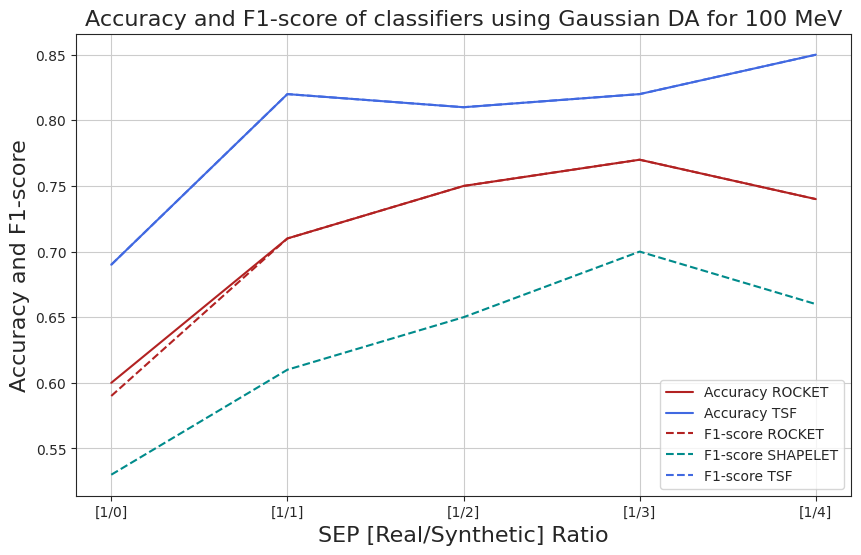

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
plt.grid()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(ACC_ROCKET, color = 'firebrick', label = 'Accuracy ROCKET')
plt.plot(ACC_TSF, color = 'royalblue', label = 'Accuracy TSF')

plt.plot(F1_ROCKET, color = 'firebrick', label = 'F1-score ROCKET', linestyle='dashed')
plt.plot(F1_SHAPELET, color = 'darkcyan', label = 'F1-score SHAPELET', linestyle='dashed')
plt.plot(F1_TSF, color = 'royalblue', label = 'F1-score TSF', linestyle='dashed')


plt.xticks([0, 1, 2, 3, 4], ["[1/0]", "[1/1]", "[1/2]", "[1/3]", "[1/4]"])
plt.title('Accuracy and F1-score of classifiers using Gaussian DA for 100 MeV', fontsize = '16')
plt.xlabel('SEP [Real/Synthetic] Ratio', fontsize = '16')
plt.ylabel('Accuracy and F1-score', fontsize = '16')
plt.grid()
plt.legend()
plt.show()



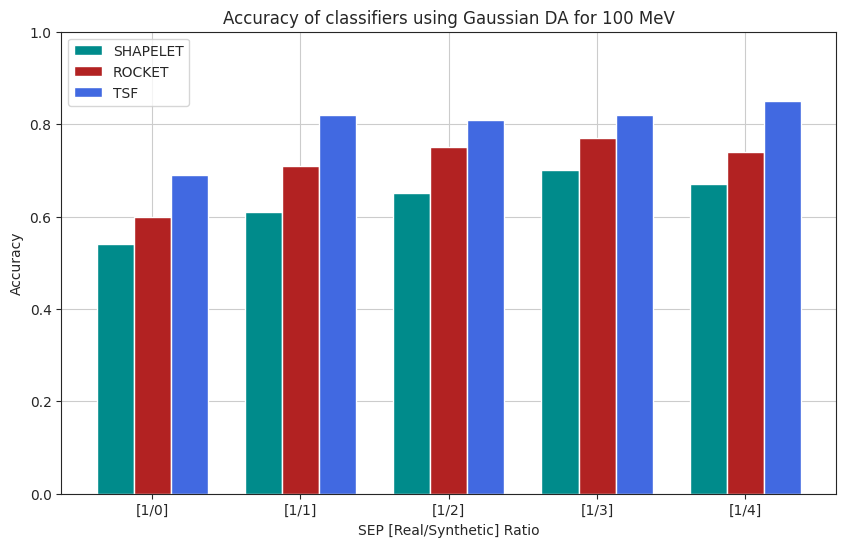

In [ ]:
X = ["[1/0]", "[1/1]", "[1/2]", "[1/3]", "[1/4]"]
Wgb = ACC_ROCKET
Ygirls = ACC_SHAPELET
Zboys = ACC_TSF
  
X_axis = np.arange(len(X))

ind = np.arange(len(X)) 
width = 0.25

plt.bar(ind, Ygirls, width, label = 'SHAPELET', color = 'darkcyan')
plt.bar(ind + width, Wgb, width, label = 'ROCKET', color = 'firebrick')
plt.bar(ind + width*2, Zboys, width, label = 'TSF', color = 'royalblue')

plt.ylim(0, 1)
plt.xticks(ind+width, X)
plt.xlabel("SEP [Real/Synthetic] Ratio")
plt.ylabel("Accuracy")
plt.title("Accuracy of classifiers using Gaussian DA for 100 MeV")
plt.legend()
plt.show()

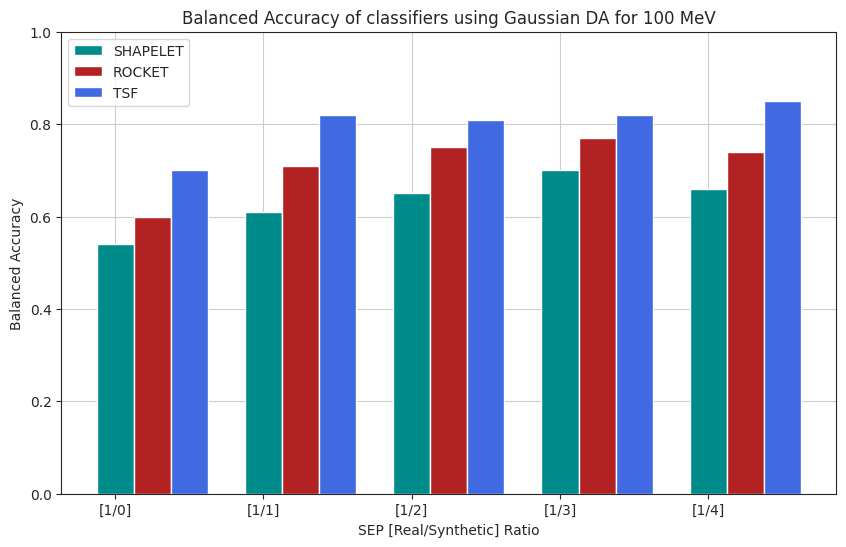

In [ ]:
X = ["[1/0]", "[1/1]", "[1/2]", "[1/3]", "[1/4]"]
ww = ACCBALANCED_ROCKET
Ygirls = ACCBALANCED_SHAPELET
Zboys = ACCBALANCED_TSF
  
X_axis = np.arange(len(X))

ind = np.arange(len(X)) 
width = 0.25

plt.bar(ind, Ygirls, width, label = 'SHAPELET', color = 'darkcyan')
plt.bar(ind + width, ww, width, label = 'ROCKET', color = 'firebrick')
plt.bar(ind + width*2, Zboys, width, label = 'TSF', color = 'royalblue')
  
plt.ylim(0, 1)
plt.xticks(X_axis, X)
plt.xlabel("SEP [Real/Synthetic] Ratio")
plt.ylabel("Balanced Accuracy")
plt.title("Balanced Accuracy of classifiers using Gaussian DA for 100 MeV")
plt.legend()
plt.show()

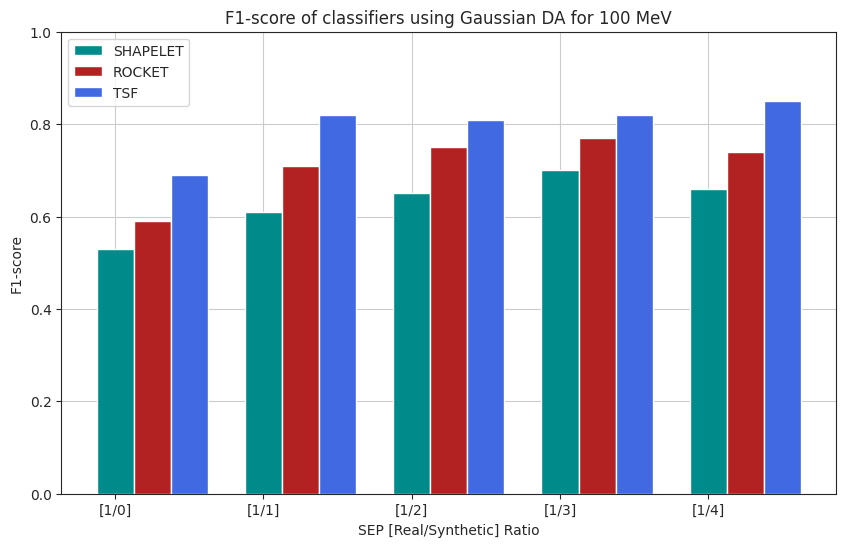

In [ ]:
X = ["[1/0]", "[1/1]", "[1/2]", "[1/3]", "[1/4]"]
www = F1_ROCKET
Ygirls = F1_SHAPELET
Zboys = F1_TSF
  
X_axis = np.arange(len(X))

ind = np.arange(len(X)) 
width = 0.25

plt.bar(ind, Ygirls, width, label = 'SHAPELET', color = 'darkcyan')
plt.bar(ind + width, www, width, label = 'ROCKET', color = 'firebrick')
plt.bar(ind + width*2, Zboys, width, label = 'TSF', color = 'royalblue')

plt.ylim(0, 1)
plt.xticks(X_axis, X)
plt.xlabel("SEP [Real/Synthetic] Ratio")
plt.ylabel("F1-score")
plt.title("F1-score of classifiers using Gaussian DA for 100 MeV")
plt.legend()
plt.show()

# BOX Plots

In [ ]:

data1 = [lst_accu_stratified_A_ROCKET, box_accuracy_B_ROCKET[All_box_ACC_ROCKET_B.index(max(All_box_ACC_ROCKET_B))], box_accuracy_C_ROCKET[All_box_ACC_ROCKET_C.index(max(All_box_ACC_ROCKET_C))], box_accuracy_D_ROCKET[All_box_ACC_ROCKET_D.index(max(All_box_ACC_ROCKET_D))], box_accuracy_E_ROCKET[All_box_ACC_ROCKET_E.index(max(All_box_ACC_ROCKET_E))]]
data1_F = [val for sublist in data1 for val in sublist]

data1_5 = [lst_accu_stratified_A_SHAPELET, box_accuracy_B_SHAPELET[All_box_ACC_SHAPELET_B.index(max(All_box_ACC_SHAPELET_B))], box_accuracy_C_SHAPELET[All_box_ACC_SHAPELET_C.index(max(All_box_ACC_SHAPELET_C))], box_accuracy_D_SHAPELET[All_box_ACC_SHAPELET_D.index(max(All_box_ACC_SHAPELET_D))], box_accuracy_E_SHAPELET[All_box_ACC_SHAPELET_E.index(max(All_box_ACC_SHAPELET_E))]]
data1_5_F = [val for sublist in data1_5 for val in sublist]

data2 = [lst_accu_stratified_A_TSF, box_accuracy_B_TSF[All_box_ACC_TSF_B.index(max(All_box_ACC_TSF_B))], box_accuracy_C_TSF[All_box_ACC_TSF_C.index(max(All_box_ACC_TSF_C))], box_accuracy_D_TSF[All_box_ACC_TSF_D.index(max(All_box_ACC_TSF_D))], box_accuracy_E_TSF[All_box_ACC_TSF_E.index(max(All_box_ACC_TSF_E))]]
data2_F = [val for sublist in data2 for val in sublist]



DA_label = []
for i in range(0, len(data1_F)):
  if i <= 9:
    DA_label.append('[1/0]')
  if 9 < i <= 19:
    DA_label.append('[1/1]')
  if 19 < i <= 29:
    DA_label.append('[1/2]')
  if 29 < i <= 39:
    DA_label.append('[1/3]')
  if 39 < i <= 49:
    DA_label.append('[1/4]')
  
DA_label_F = DA_label + DA_label + DA_label


In [ ]:
import pandas as pd

dataframe1 = pd.DataFrame(
    {'Values' : data1_F
     }
    )


dataframe1_5 = pd.DataFrame(
    {'Values' : data1_5_F
     }
    )


dataframe2 = pd.DataFrame(
    {'Values' : data2_F
     }
    )
    #  'SEP [Real/Synthetic] Ratio': DA_label

my_df_ = dataframe1_5.append(dataframe1, ignore_index= True)
my_df = my_df_.append(dataframe2, ignore_index= True)
# df = pd.concat([pd.Series(x) for x in data2_F], axis=1)

<ipython-input-184-23a262b1e273>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df_ = dataframe1_5.append(dataframe1, ignore_index= True)
<ipython-input-184-23a262b1e273>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df_.append(dataframe2, ignore_index= True)


In [ ]:
# Classifiers = []
# for j in range(80):
#   if j <=39:
#     Classifiers.append('ROCKET')
#   if 39 < j <=79:
#     Classifiers.append('TSF')

In [ ]:
Classifiers = []
for j in range(150):
  if j <=49:
    Classifiers.append('SHAPELET')
  if 49 < j <=99:
    Classifiers.append('ROCKET')
  if 99 < j <=149:
    Classifiers.append('TSF')

In [ ]:
my_df.insert(1, 'SEP [Real/Synthetic] Ratio', DA_label_F, True)
my_df.insert(2, 'Classifiers', Classifiers, True)

In [ ]:
# my_df

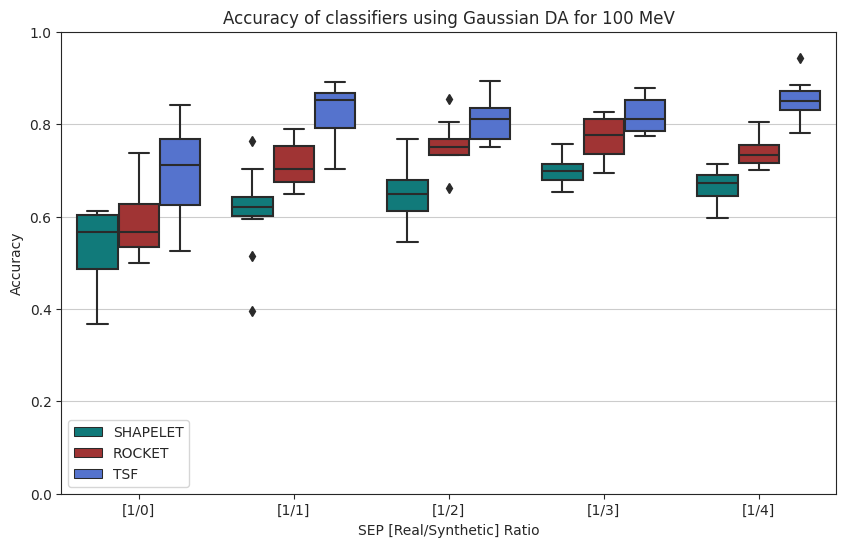

In [ ]:
import seaborn as sns

sns.boxplot(x=my_df['SEP [Real/Synthetic] Ratio'], y=my_df['Values'], hue =my_df['Classifiers'], palette =['darkcyan', 'firebrick', 'royalblue'], data=pd.melt(my_df))


plt.ylim(0, 1)

plt.xlabel("SEP [Real/Synthetic] Ratio")
plt.ylabel("Accuracy")
plt.title("Accuracy of classifiers using Gaussian DA for 100 MeV")
plt.legend()
plt.show()


In [ ]:
# # Extra. ... For 15h and multivariate

# import seaborn as sns

# sns.boxplot(x=my_df['SEP [Real/Synthetic] Ratio'], y=my_df['Values'], hue =my_df['Classifiers'], palette =['darkcyan', 'firebrick', 'royalblue'], data=pd.melt(my_df))


# plt.ylim(0, 1)
# # plt.xticks([1, 2, 3, 4], ["[1/0]", "[1/1]", "[1/2]", "[1/3]"])
# plt.xlabel("SEP [Real/Synthetic] Ratio")
# plt.ylabel("Accuracy")
# plt.title("Accuracy of multivariate time series (15h) classifiers using Gaussian DA for 100 MeV")
# plt.legend()
# plt.show()


In [ ]:
# # Extra. ... For 15h and multivariate

# import seaborn as sns

# sns.boxplot(x=my_df['SEP [Real/Synthetic] Ratio'], y=my_df['Values'], hue =my_df['Classifiers'], palette =['green', 'red', 'blue'], data=pd.melt(my_df))


# plt.ylim(0, 1)
# # plt.xticks([1, 2, 3, 4], ["[1/0]", "[1/1]", "[1/2]", "[1/3]"])
# plt.xlabel("SEP [Real/Synthetic] Ratio")
# plt.ylabel("Accuracy")
# plt.title("Accuracy of multivariate time series (15h) classifiers using Gaussian DA for 100 MeV")
# plt.legend()
# plt.show()


In [ ]:

# # data = [lst_accu_stratified_A_TSF, box_accuracy_B_TSF[2], box_accuracy_C_TSF[0], box_accuracy_D_TSF[4]]

# # Creating axes instance
# # ax = fig.add_axes([0, 0, 1, 1])
 
# # Creating plot
# bp = plt.boxplot(data1, patch_artist=True)
# bp['boxes'][0].set_color('red')
# bp['boxes'][1].set_color('red')
# bp['boxes'][2].set_color('red')
# bp['boxes'][3].set_color('red')
# bp['boxes'][4].set_color('red')

# plt.ylim(0, 1)
# plt.xticks([1, 2, 3, 4, 5], ["[1/0]", "[1/1]", "[1/2]", "[1/3]", "[1/4]"])
# plt.xlabel("SEP [Real/Synthetic] Ratio")
# plt.ylabel("Accuracy")
# plt.title("Accuracy of multivariate time series (15h) ROCKET using Gaussian DA for 100 MeV")
# # plt.legend()
# plt.show()

In [ ]:
from pandas import read_csv

DF1 = pd.DataFrame()
my1 = pd.Series(data1_F)
my1.to_csv('/content/Gaussian_100MEV_ROCKET_Accuracy.csv', index=False)

In [ ]:

# # data = [lst_accu_stratified_A_TSF, box_accuracy_B_TSF[2], box_accuracy_C_TSF[0], box_accuracy_D_TSF[4]]

# # Creating axes instance
# # ax = fig.add_axes([0, 0, 1, 1])
 
# # Creating plot
# bp = plt.boxplot(data1_5, patch_artist=True)
# bp['boxes'][0].set_color('green')
# bp['boxes'][1].set_color('green')
# bp['boxes'][2].set_color('green')
# bp['boxes'][3].set_color('green')
# bp['boxes'][4].set_color('green')

# plt.ylim(0, 1)
# plt.xticks([1, 2, 3, 4, 5], ["[1/0]", "[1/1]", "[1/2]", "[1/3]", "[1/4]"])
# plt.xlabel("SEP [Real/Synthetic] Ratio")
# plt.ylabel("Accuracy")
# plt.title("Accuracy of multivariate time series (15h) SHAPELET using Gaussian DA for 100 MeV")
# plt.legend()
# plt.show()

In [ ]:
from pandas import read_csv

DF1_5 = pd.DataFrame()
my1_5 = pd.Series(data1_5_F)
my1_5.to_csv('/content/Gaussian_100MEV_SHAPELET_Accuracy.csv', index=False)

In [ ]:

# # data = [lst_accu_stratified_A_TSF, box_accuracy_B_TSF[2], box_accuracy_C_TSF[0], box_accuracy_D_TSF[4]]

# # Creating axes instance
# # ax = fig.add_axes([0, 0, 1, 1])
 
# # Creating plot
# plt.boxplot(data2, patch_artist=True)

# plt.ylim(0, 1)
# plt.xticks([1, 2, 3, 4, 5], ["[1/0]", "[1/1]", "[1/2]", "[1/3]", "[1/4]"])
# plt.xlabel("SEP [Real/Synthetic] Ratio")
# plt.ylabel("Accuracy")
# plt.title("Accuracy of multivariate time series TSF (15h) using Gaussian DA for 100 MeV")
# # plt.legend()
# plt.show()

In [ ]:
from pandas import read_csv

DF2 = pd.DataFrame()
my2 = pd.Series(data2_F)
my2.to_csv('/content/Gaussian_100MEV_TSF_Accuracy.csv', index=False)

In [ ]:


data1 = [lst_accuBalanced_stratified_A_ROCKET, box_accuracyBalanced_B_ROCKET[All_box_ACCBALANCED_ROCKET_B.index(max(All_box_ACCBALANCED_ROCKET_B))], box_accuracyBalanced_C_ROCKET[All_box_ACCBALANCED_ROCKET_C.index(max(All_box_ACCBALANCED_ROCKET_C))], box_accuracyBalanced_D_ROCKET[All_box_ACCBALANCED_ROCKET_D.index(max(All_box_ACCBALANCED_ROCKET_D))], box_accuracyBalanced_E_ROCKET[All_box_ACCBALANCED_ROCKET_E.index(max(All_box_ACCBALANCED_ROCKET_E))]]
data1_F = [val for sublist in data1 for val in sublist]

data1_5 = [lst_accuBalanced_stratified_A_SHAPELET, box_accuracyBalanced_B_SHAPELET[All_box_ACCBALANCED_SHAPELET_B.index(max(All_box_ACCBALANCED_SHAPELET_B))], box_accuracyBalanced_C_SHAPELET[All_box_ACCBALANCED_SHAPELET_C.index(max(All_box_ACCBALANCED_SHAPELET_C))], box_accuracyBalanced_D_SHAPELET[All_box_ACCBALANCED_SHAPELET_D.index(max(All_box_ACCBALANCED_SHAPELET_D))], box_accuracyBalanced_E_SHAPELET[All_box_ACCBALANCED_SHAPELET_E.index(max(All_box_ACCBALANCED_SHAPELET_E))]]
data1_5_F = [val for sublist in data1_5 for val in sublist]

data2 = [lst_accuBalanced_stratified_A_TSF, box_accuracyBalanced_B_TSF[All_box_ACCBALANCED_TSF_B.index(max(All_box_ACCBALANCED_TSF_B))], box_accuracyBalanced_C_TSF[All_box_ACCBALANCED_TSF_C.index(max(All_box_ACCBALANCED_TSF_C))], box_accuracyBalanced_D_TSF[All_box_ACCBALANCED_TSF_D.index(max(All_box_ACCBALANCED_TSF_D))], box_accuracyBalanced_E_TSF[All_box_ACCBALANCED_TSF_E.index(max(All_box_ACCBALANCED_TSF_E))]]
data2_F = [val for sublist in data2 for val in sublist]



DA_label = []
for i in range(0, len(data1_F)):
  if i <= 9:
    DA_label.append('[1/0]')
  if 9 < i <= 19:
    DA_label.append('[1/1]')
  if 19 < i <= 29:
    DA_label.append('[1/2]')
  if 29 < i <= 39:
    DA_label.append('[1/3]')
  if 39 < i <= 49:
    DA_label.append('[1/4]')
  
DA_label_F = DA_label + DA_label + DA_label


In [ ]:
import pandas as pd

dataframe1 = pd.DataFrame(
    {'Values' : data1_F
     }
    )

dataframe1_5 = pd.DataFrame(
    {'Values' : data1_5_F
     }
    )

dataframe2 = pd.DataFrame(
    {'Values' : data2_F
     }
    )
    #  'SEP [Real/Synthetic] Ratio': DA_label

my_df_ = dataframe1_5.append(dataframe1, ignore_index= True)
my_df = my_df_.append(dataframe2, ignore_index= True)
# df = pd.concat([pd.Series(x) for x in data2_F], axis=1)

<ipython-input-199-a7a91ddb5085>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df_ = dataframe1_5.append(dataframe1, ignore_index= True)
<ipython-input-199-a7a91ddb5085>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df_.append(dataframe2, ignore_index= True)


In [ ]:
# Classifiers = []
# for j in range(80):
#   if j <=39:
#     Classifiers.append('ROCKET')
#   if 39 < j <=79:
#     Classifiers.append('TSF')

In [ ]:
Classifiers = []
for j in range(150):
  if j <=49:
    Classifiers.append('SHAPELET')
  if 49 < j <=99:
    Classifiers.append('ROCKET')
  if 99 < j <=149:
    Classifiers.append('TSF')

In [ ]:
my_df.insert(1, 'SEP [Real/Synthetic] Ratio', DA_label_F, True)
my_df.insert(2, 'Classifiers', Classifiers, True)

In [ ]:
# my_df

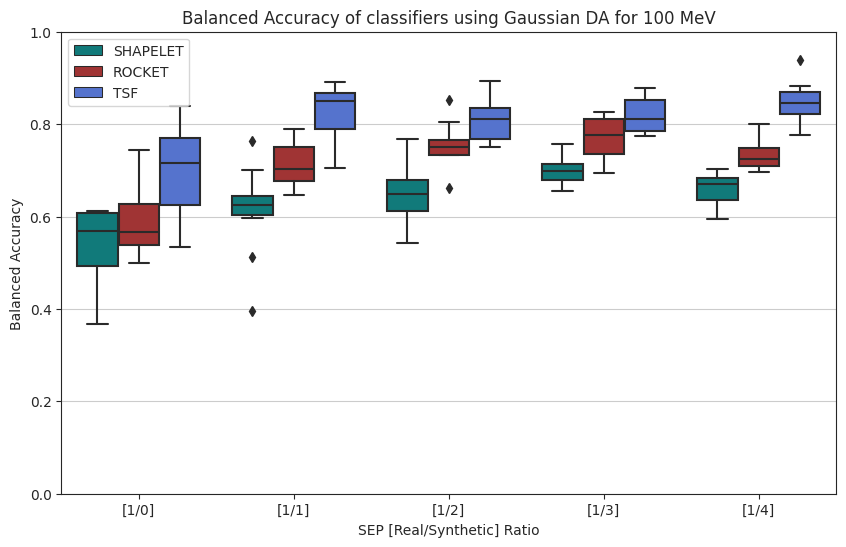

In [ ]:
import seaborn as sns

sns.boxplot(x=my_df['SEP [Real/Synthetic] Ratio'], y=my_df['Values'], hue =my_df['Classifiers'], palette =['darkcyan', 'firebrick', 'royalblue'], data=pd.melt(my_df))


plt.ylim(0, 1)
# plt.xticks([1, 2, 3, 4], ["[1/0]", "[1/1]", "[1/2]", "[1/3]"])
plt.xlabel("SEP [Real/Synthetic] Ratio")
plt.ylabel("Balanced Accuracy")
plt.title("Balanced Accuracy of classifiers using Gaussian DA for 100 MeV")
plt.legend()
plt.show()


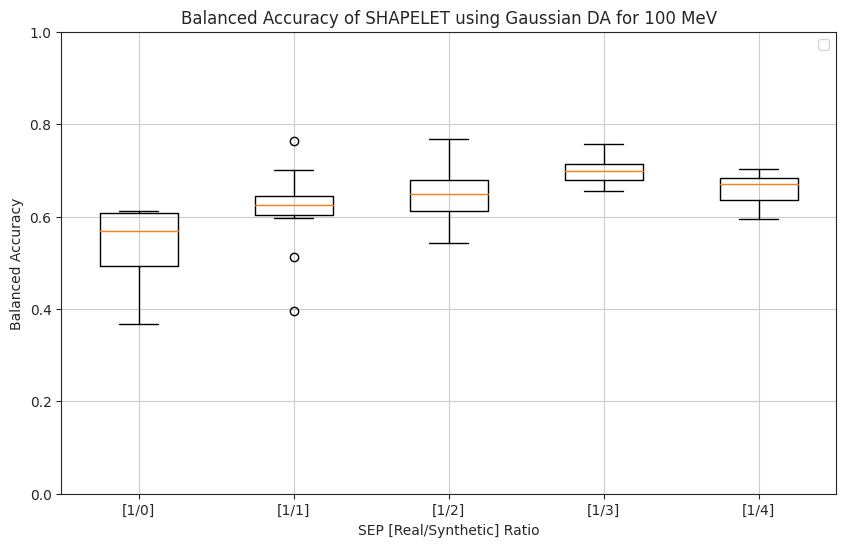

In [ ]:

 
# Creating plot
plt.boxplot(data1_5)

plt.ylim(0, 1)
plt.xticks([1, 2, 3, 4, 5], ["[1/0]", "[1/1]", "[1/2]", "[1/3]", "[1/4]"])
plt.xlabel("SEP [Real/Synthetic] Ratio")
plt.ylabel("Balanced Accuracy")
plt.title("Balanced Accuracy of SHAPELET using Gaussian DA for 100 MeV")
plt.legend()
plt.show()

In [ ]:
from pandas import read_csv

DF1_5 = pd.DataFrame()
my1_5 = pd.Series(data1_5_F)
my1_5.to_csv('/content/Gaussian_100MEV_SHAPELET_BalancedAccuracy.csv', index=False)

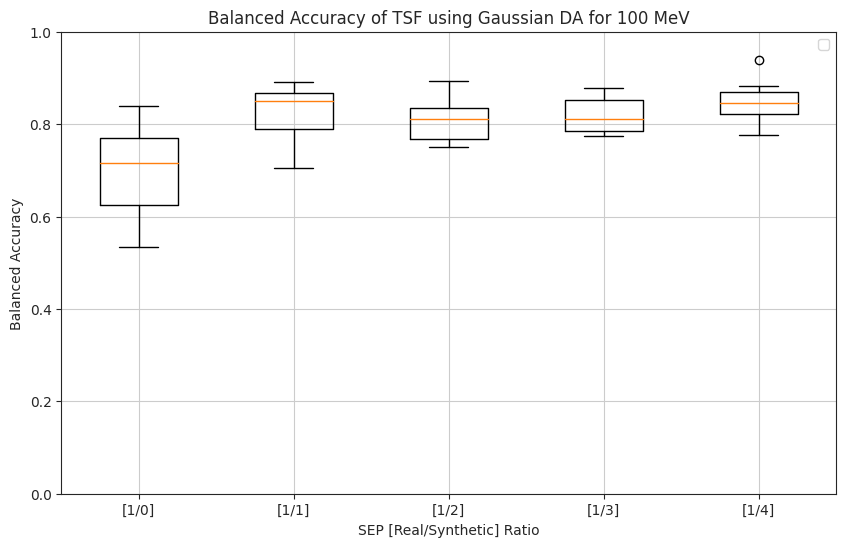

In [ ]:

 
# Creating plot
plt.boxplot(data2)

plt.ylim(0, 1)
plt.xticks([1, 2, 3, 4, 5], ["[1/0]", "[1/1]", "[1/2]", "[1/3]", "[1/4]"])
plt.xlabel("SEP [Real/Synthetic] Ratio")
plt.ylabel("Balanced Accuracy")
plt.title("Balanced Accuracy of TSF using Gaussian DA for 100 MeV")
plt.legend()
plt.show()

In [ ]:
from pandas import read_csv

DF2 = pd.DataFrame()
my2 = pd.Series(data2_F)
my2.to_csv('/content/Gaussian_100MEV_TSF_BalancedAccuracy.csv', index=False)

In [ ]:

data1_f1Score = [lst_f1_stratified_A_ROCKET, box_f1_B_ROCKET[All_box_ACC_ROCKET_B.index(max(All_box_ACC_ROCKET_B))], box_f1_C_ROCKET[All_box_ACC_ROCKET_C.index(max(All_box_ACC_ROCKET_C))], box_f1_D_ROCKET[All_box_ACC_ROCKET_D.index(max(All_box_ACC_ROCKET_D))], box_f1_E_ROCKET[All_box_ACC_ROCKET_E.index(max(All_box_ACC_ROCKET_E))]]  # F1-Score based on hyperparameters of the largest accuracy
data1_F_f1Score = [val for sublist in data1_f1Score for val in sublist]

data1_5_f1Score = [lst_f1_stratified_A_SHAPELET, box_f1_B_SHAPELET[All_box_ACC_SHAPELET_B.index(max(All_box_ACC_SHAPELET_B))], box_f1_C_SHAPELET[All_box_ACC_SHAPELET_C.index(max(All_box_ACC_SHAPELET_C))], box_f1_D_SHAPELET[All_box_ACC_SHAPELET_D.index(max(All_box_ACC_SHAPELET_D))], box_f1_E_SHAPELET[All_box_ACC_SHAPELET_E.index(max(All_box_ACC_SHAPELET_E))]]  # F1-Score based on hyperparameters of the largest accuracy
data1_5_F_f1Score = [val for sublist in data1_5_f1Score for val in sublist]

data2_f1Score = [lst_f1_stratified_A_TSF, box_f1_B_TSF[All_box_ACC_TSF_B.index(max(All_box_ACC_TSF_B))], box_f1_C_TSF[All_box_ACC_TSF_C.index(max(All_box_ACC_TSF_C))], box_f1_D_TSF[All_box_ACC_TSF_D.index(max(All_box_ACC_TSF_D))], box_f1_E_TSF[All_box_ACC_TSF_E.index(max(All_box_ACC_TSF_E))]]
data2_F_f1Score = [val for sublist in data2_f1Score for val in sublist]



DA_label = []
for i in range(0, len(data1_F_f1Score)):
  if i <= 9:
    DA_label.append('[1/0]')
  if 9 < i <= 19:
    DA_label.append('[1/1]')
  if 19 < i <= 29:
    DA_label.append('[1/2]')
  if 29 < i <= 39:
    DA_label.append('[1/3]')
  if 39 < i <= 49:
    DA_label.append('[1/4]')
  
DA_label_F = DA_label + DA_label + DA_label


In [ ]:
import pandas as pd

dataframe1 = pd.DataFrame(
    {'Values' : data1_F_f1Score
     }
    )

dataframe1_5 = pd.DataFrame(
    {'Values' : data1_5_F_f1Score
     }
    )

dataframe2 = pd.DataFrame(
    {'Values' : data2_F_f1Score
     }
    )
    #  'SEP [Real/Synthetic] Ratio': DA_label

my_df_ = dataframe1_5.append(dataframe1, ignore_index= True)
my_df = my_df_.append(dataframe2, ignore_index= True)
# df = pd.concat([pd.Series(x) for x in data2_F], axis=1)

<ipython-input-210-98b3712638c0>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df_ = dataframe1_5.append(dataframe1, ignore_index= True)
<ipython-input-210-98b3712638c0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df_.append(dataframe2, ignore_index= True)


In [ ]:
# Classifiers = []
# for j in range(80):
#   if j <=39:
#     Classifiers.append('ROCKET')
#   if 39 < j <=79:
#     Classifiers.append('TSF')

In [ ]:
Classifiers = []
for j in range(150):
  if j <=49:
    Classifiers.append('SHAPELET')
  if 49 < j <=99:
    Classifiers.append('ROCKET')
  if 99 < j <=149:
    Classifiers.append('TSF')

In [ ]:
my_df.insert(1, 'SEP [Real/Synthetic] Ratio', DA_label_F, True)
my_df.insert(2, 'Classifiers', Classifiers, True)

In [ ]:
# my_df

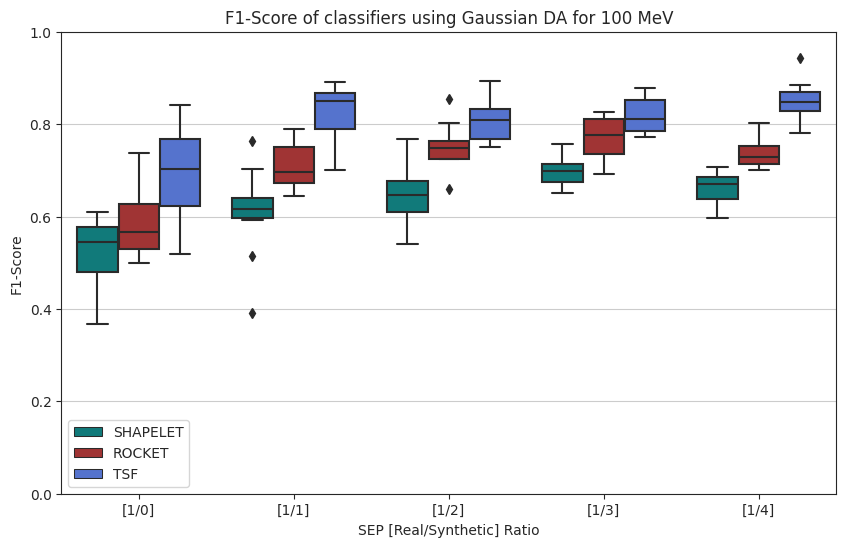

In [ ]:
import seaborn as sns

sns.boxplot(x=my_df['SEP [Real/Synthetic] Ratio'], y=my_df['Values'], hue =my_df['Classifiers'], palette =['darkcyan', 'firebrick', 'royalblue'], data=pd.melt(my_df))


plt.ylim(0, 1)

plt.xlabel("SEP [Real/Synthetic] Ratio")
plt.ylabel("F1-Score")
plt.title("F1-Score of classifiers using Gaussian DA for 100 MeV")
plt.legend()
plt.show()
